# EDA On US Flight Fare
### 2172026 - Nathan Joshua

## Today's EDA is all about US Flight Fare, why is it very inconsistent, why is it very much expensive, and most importantly what's is the determinator for all of the prices. It's gonna be a long journey so buckle up, let's fly with me!

### First stop is import neccessary modul and data preparation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's get some info from this data.

In [5]:
df = pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv")
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_17376\3416570006.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv")


tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1  ...    fare  carrier_lg  large_ms  fare_lg  \
0        14112       ABE  ...   81.43          G4    1.0000    81.43   
1        15304       ABE  ...  208.93          DL    0.4659   219.98   
2        11259       ABQ  ...  184.56          WN    0.9968   184.44   
3        11298       ABQ  ...  182.64          AA    0.9774   183.09   
4        14107       ABQ  ...  177.11          WN    0.6061   184.49   

  carrier_low   lf_ms  fare_low Geocoded_City1  Geocoded_City2  \
0          G4  1.0000     81.43            NaN             NaN   
1          UA  0.1193    154.11            NaN             NaN   
2          WN  0.9968    184.44            NaN             NaN   
3          AA  0.9774    183.09            NaN             NaN   
4          AA  0.3939    165.77            NaN             NaN   

                 tbl1apk  
0  202131013514112ABEPIE  
1  202131013515304ABETPA  
2  202131014011259ABQDAL  
3  202131014011298ABQDFW  
4  202131014014107ABQPHX  

[5 rows x 23 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [11]:
df.shape

(245955, 23)

In [12]:
df.columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')

In [13]:
df.describe()

Year        quarter  citymarketid_1  citymarketid_2  \
count  245955.000000  245955.000000   245955.000000   245955.000000   
mean     2008.524124       2.479153    31556.430201    32180.117086   
std         8.703364       1.122149     1089.872880     1232.464184   
min      1993.000000       1.000000    30135.000000    30189.000000   
25%      2001.000000       1.000000    30721.000000    30994.000000   
50%      2008.000000       2.000000    31423.000000    32211.000000   
75%      2016.000000       3.000000    32467.000000    33192.000000   
max      2024.000000       4.000000    35412.000000    35628.000000   

         airportid_1    airportid_2        nsmiles     passengers  \
count  245955.000000  245955.000000  245955.000000  245955.000000   
mean    12437.099986   13249.889525    1189.812319     299.476795   
std      1431.665257    1425.810159     703.143472     511.389486   
min     10135.000000   10466.000000     109.000000       0.000000   
25%     11193.000000   12197.000000     626.000000      21.000000   
50%     12266.000000   13303.000000    1023.000000     113.000000   
75%     13487.000000   14679.000000    1736.000000     339.000000   
max     16440.000000   15919.000000    2724.000000    8301.000000   

                fare       large_ms        fare_lg          lf_ms  \
count  245955.000000  244415.000000  244415.000000  244343.000000   
mean      218.979587       0.665252     218.710963       0.450438   
std        82.372486       0.224635      84.674363       0.332669   
min        50.000000       0.003800      50.000000       0.010000   
25%       164.620000       0.480000     161.500000       0.158000   
50%       209.320000       0.652400     208.030000       0.360000   
75%       262.890000       0.871900     263.640000       0.750000   
max      3377.000000       1.000000    2725.600000       1.000000   

            fare_low  
count  244343.000000  
mean      190.675939  
std        73.577694  
min        50.000000  
25%       140.060000  
50%       181.630000  
75%       230.040000  
max      2725.600000

In [14]:
df.isnull().sum()

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1540
large_ms           1540
fare_lg            1540
carrier_low        1612
lf_ms              1612
fare_low           1612
Geocoded_City1    39206
Geocoded_City2    39206
tbl1apk               0
dtype: int64

In [15]:
df.duplicated().sum()

0

### Now that we got the information from the dataset, lets take a look for some interesting column that can be very determine for the fareow


## Fare Colomn


In [18]:
df["fare"].sample(n=10)

179359    196.84
85964     370.45
24234     152.62
156484    142.91
212154    237.42
138966    167.56
124450    275.11
130104    232.36
84236     140.50
103057    248.99
Name: fare, dtype: float64

In [19]:
harga = df.groupby(['fare_lg','fare_low'])['fare'].mean().reset_index().sample(10)
harga

fare_lg  fare_low     fare
85338   235.92    228.42  235.980
82589   232.20    232.20  241.952
58516   201.23    183.41  192.330
87319   238.63    235.53  243.400
18007   141.26    128.04  137.820
15515   135.65    131.50  135.480
33982   168.58    149.24  162.090
18295   141.82    140.76  145.770
93589   247.32    186.05  248.660
10326   121.62    108.94  117.410

## First up is Year
### The dataset is taken from us flight (1993 - 2024)

In [21]:
df["Year"].sample(n=10)

189326    2016
21143     1997
97304     1997
165365    2011
188679    2016
209763    2018
143353    2014
214630    2019
188169    2016
64011     2006
Name: Year, dtype: int64

### next is Quarter
#### Let's see the sample of this data

In [23]:
df[['Year', 'quarter']].sample(n=10)

Year  quarter
125994  2002        4
66378   2003        2
106380  2011        2
193931  2016        3
192937  2016        3
168849  1997        2
121190  2012        3
121516  2004        3
208304  2018        2
73351   1993        3

## Next is city1 and city2 which is essentialy the starting city and the destination of the flight route

In [25]:
df[['city1','city2']].sample(10)

city1  \
40750   New York City, NY (Metropolitan Area)   
147224                            Orlando, FL   
17769          Boston, MA (Metropolitan Area)   
167986  New York City, NY (Metropolitan Area)   
64035                            Columbus, OH   
152342         Boston, MA (Metropolitan Area)   
192307                          Charlotte, NC   
85308                Minneapolis/St. Paul, MN   
44255                             Houston, TX   
77795                             Detroit, MI   

                                        city2  
40750                      Raleigh/Durham, NC  
147224                            Phoenix, AZ  
17769                         Kansas City, MO  
167986                     Salt Lake City, UT  
64035   New York City, NY (Metropolitan Area)  
152342                            Detroit, MI  
192307  New York City, NY (Metropolitan Area)  
85308           Tampa, FL (Metropolitan Area)  
44255   New York City, NY (Metropolitan Area)  
77795                             Orlando, FL

## Next is nsmiles

In [27]:
df['nsmiles'].sample(10)

34731      640
235056     945
88927      963
232369    1974
20325      659
106133     337
237813    2510
19982     2358
74221     1071
170653    1559
Name: nsmiles, dtype: int64

## Next is passangers which is the amount of passangers of that flight route

In [29]:
print(df['passengers'].sample(10))

73238       19
15581      189
200323       3
19836       45
17132     1288
205025     311
62967       87
132459     263
62032        2
126278       0
Name: passengers, dtype: int64


## Next is carrier_low and carrier_lg which is what airline code for (low market share and high market share) that used for that flight

In [31]:
df[['carrier_low','carrier_lg']].sample(10)

carrier_low carrier_lg
177774          CO         CO
173987          US         US
176207          CO         US
95005           DL         DL
223843          WN         WN
214096          B6         B6
121729          AA         US
136637          WN         WN
29919           UA         UA
125844          CO         CO

In [32]:
df[['airport_1','airport_2']].sample(10)

airport_1 airport_2
139456       GRR       DCA
66830        MHT       CLE
47336        EWR       TPA
139970       SRQ       IAD
30355        NYC       DCA
106113       IAH       PHL
56788        IAH       LAX
24672        CLE       LGA
161996       ORD       JFK
118188       BHM       HPN

In [33]:
df['nsmiles'].sample(10)

144831    1751
64486     1996
121167    1307
185626     469
107410     967
192667    1027
190966     453
223399    2300
137043    2296
105173    1556
Name: nsmiles, dtype: int64

## Next is airport, either origin or destination

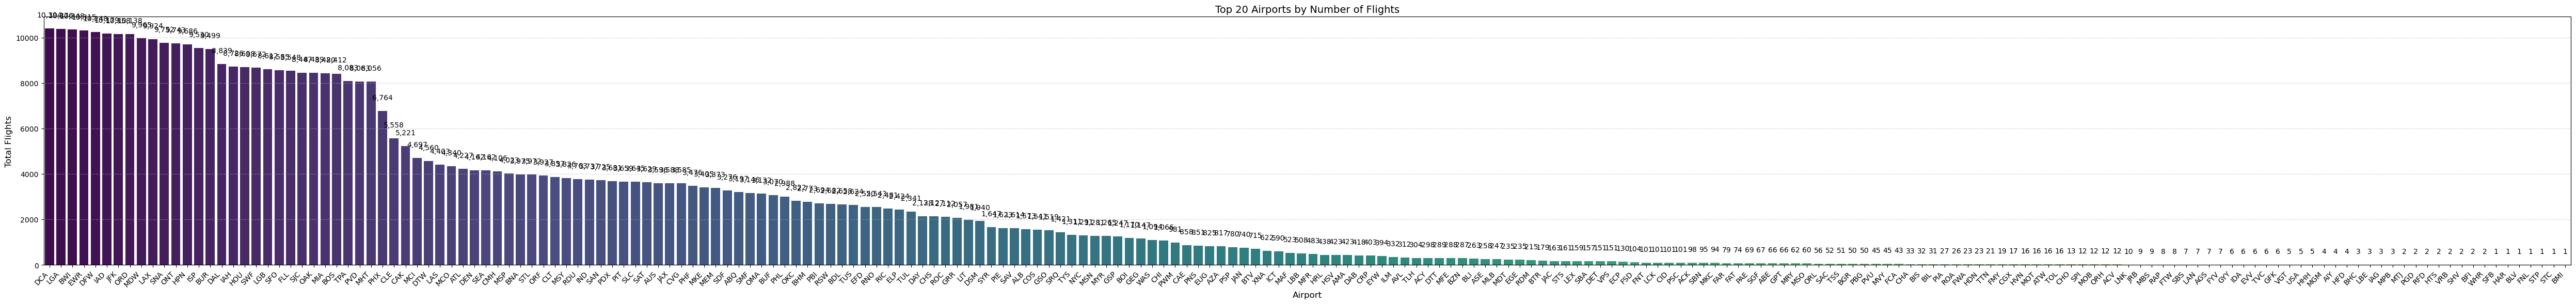

In [35]:



# Gabungkan airport1 dan airport2 ke dalam satu kolom untuk menghitung total penerbangan
all_airports = pd.concat([df['airport_1'], df['airport_2']])

# Hitung jumlah penerbangan per bandara
airport_counts = all_airports.value_counts().reset_index()
airport_counts.columns = ['Airport', 'Total Flights']

# Pilih top 20 bandara dengan penerbangan terbanyak
top_airports = airport_counts

# Plot visualisasi
plt.figure(figsize=(50, 6))
sns.barplot(data=top_airports, x='Airport', y='Total Flights', palette='viridis')

# Tambahkan anotasi jumlah penerbangan di atas batang
for i, flights in enumerate(top_airports['Total Flights']):
    plt.text(i, flights + 500, f"{flights:,}", ha='center', fontsize=10, color='black')

# Format plot
plt.xlabel('Airport', fontsize=12)
plt.ylabel('Total Flights', fontsize=12)
plt.title('Top 20 Airports by Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tampilkan plot
plt.tight_layout()
plt.show()

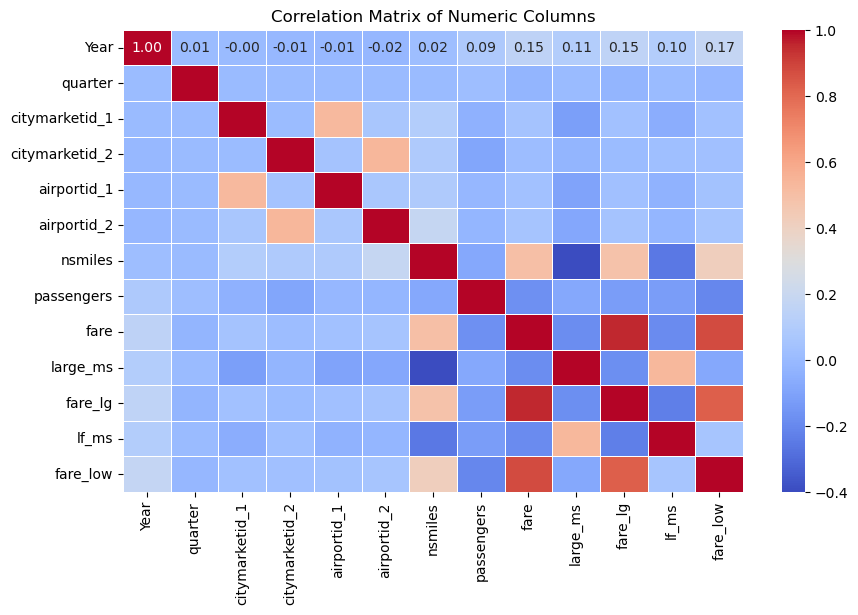

In [36]:
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

## the next destination is to do some analysis for the target column which is fare with these the important column

### Fare and Year/Quarter
#### this analysis is to see the trend of the fare through out the year and quarter

#### now lets see the top 10 year with the most fare value

In [40]:
average_fare_by_year = df.groupby('Year')['fare'].mean().reset_index()

average_fare_by_year.columns = ['Year', 'Average Fare']
top_10_years = average_fare_by_year.nlargest(10, 'Average Fare')

top_10_lowest_years = average_fare_by_year.nsmallest(10,'Average Fare')

In [41]:
top_10_years = top_10_years.reset_index(drop=True)
top_10_years

Year  Average Fare
0  2024    257.243160
1  2014    251.657087
2  2023    249.931843
3  2022    249.667511
4  2015    247.992015
5  2013    244.911938
6  2019    241.179140
7  2012    241.111118
8  2016    240.550512
9  2017    240.096521

In [42]:
top_10_lowest_years = top_10_lowest_years.reset_index(drop=True)
top_10_lowest_years

Year  Average Fare
0  2005    186.991831
1  2004    189.021593
2  2020    193.615156
3  2002    193.810930
4  2009    195.406621
5  2003    197.277303
6  2001    200.860409
7  2007    202.886365
8  1996    204.900283
9  2006    205.197657

In [43]:
df_q2_2022 = df[(df['Year'] == 2022) & (df['quarter'] == 2)]

# Statistik harga penerbangan pada Q2 2022

print(df_q2_2022)

            tbl  Year  quarter  citymarketid_1  citymarketid_2  \
6030    Table1a  2022        2           30135           33195   
6146    Table1a  2022        2           30158           32467   
6464    Table1a  2022        2           30189           30194   
6556    Table1a  2022        2           30135           33195   
6579    Table1a  2022        2           30140           30194   
...         ...   ...      ...             ...             ...   
232335  Table1a  2022        2           35412           31703   
232336  Table1a  2022        2           35412           32467   
232337  Table1a  2022        2           35412           32467   
232338  Table1a  2022        2           35412           33195   
232339  Table1a  2022        2           35412           33195   

                                 city1                                  city2  \
6030    Allentown/Bethlehem/Easton, PA          Tampa, FL (Metropolitan Area)   
6146                 Atlantic City, NJ       

### now lets add the quarter to the mix and we shall see the trend

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

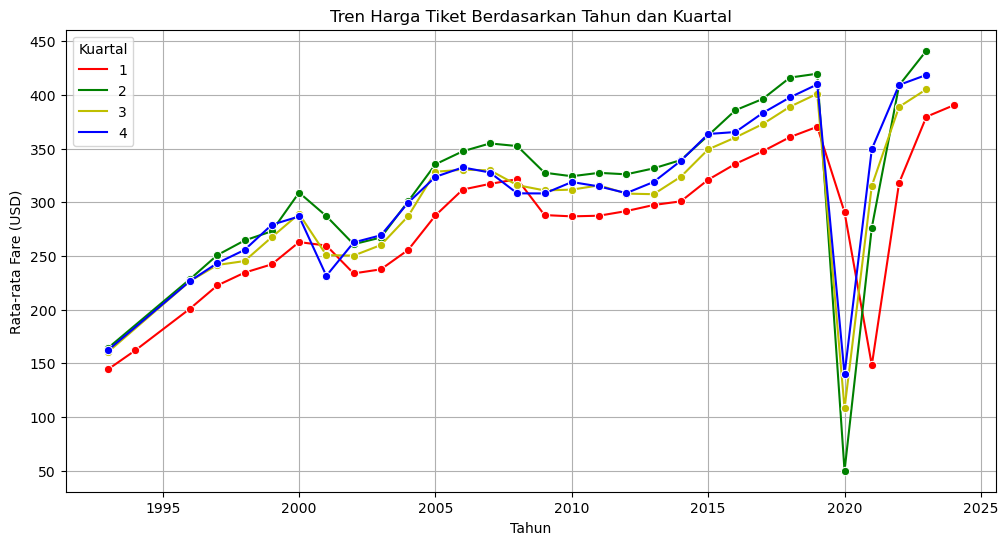

In [9]:
fare_trend = df.groupby(['Year', 'quarter'])['passengers'].mean().reset_index()

top_10_quarter_and_years = fare_trend.nlargest(10,'passengers')

top_10_quarter_and_years.reset_index(drop=True)
top_10_quarter_and_years

plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_trend, x='Year', y='passengers', hue='quarter', marker='o', palette=['r', 'g','y','b'])
plt.title('Tren Harga Tiket Berdasarkan Tahun dan Kuartal')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Fare (USD)')
plt.grid()
plt.legend(title='Kuartal', loc='upper left')
plt.show()

In [45]:
fare_trend = df.groupby(['Year', 'quarter'])['fare'].mean().reset_index()

top_10_quarter_and_years = fare_trend.nlargest(10,'fare')

top_10_quarter_and_years.reset_index(drop=True)
top_10_quarter_and_years

Year  quarter        fare
110  2022        2  268.063067
112  2022        4  259.263496
117  2024        1  257.243160
114  2023        2  256.990807
78   2014        2  256.893597
79   2014        3  256.395050
82   2015        2  254.436633
111  2022        3  253.461567
116  2023        4  253.224050
81   2015        1  252.892771

## Tren Harga Tiket berdasarkan tahun dan quarter

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

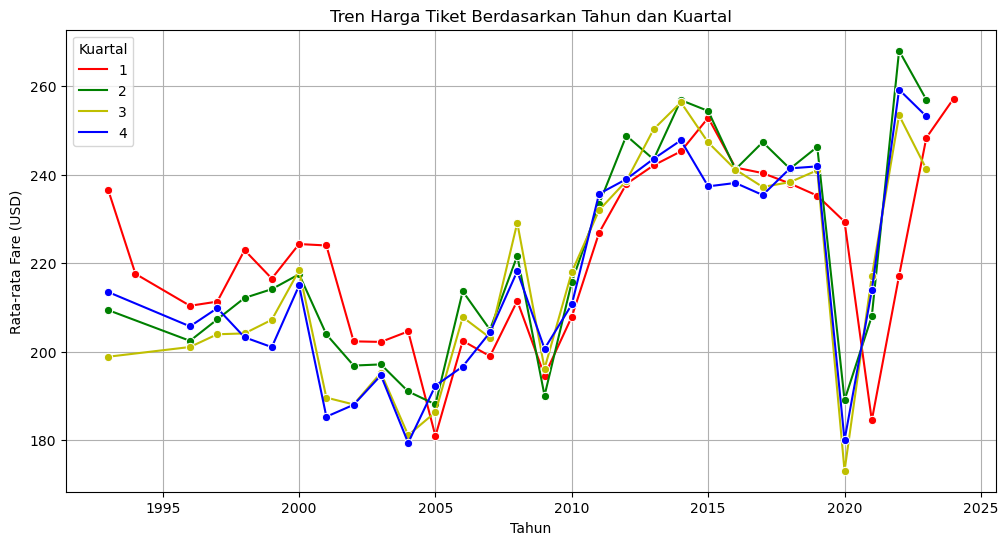

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_trend, x='Year', y='fare', hue='quarter', marker='o', palette=['r', 'g','y','b'])
plt.title('Tren Harga Tiket Berdasarkan Tahun dan Kuartal')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Fare (USD)')
plt.grid()
plt.legend(title='Kuartal', loc='upper left')
plt.show()

In [217]:
maxyear = df.groupby(['Year'])['fare'].max()
print(maxyear)

Year
1993    1081.10
1994    1608.90
1996    2074.00
1997    2034.35
1998    1824.90
1999    2628.90
2000    1871.00
2001    3377.00
2002    1295.00
2003    2104.90
2004    2716.00
2005     971.50
2006     764.95
2007    1312.00
2008    1122.36
2009    1195.00
2010     968.95
2011     972.76
2012    1115.00
2013     873.00
2014    1020.00
2015    1145.00
2016    1125.00
2017    1005.00
2018    1028.00
2019     917.00
2020    1037.20
2021    1664.00
2022     956.41
2023    1069.00
2024    1065.00
Name: fare, dtype: float64


### Fare dan carrier_lg/carrier_low

In [49]:

carrier_lg = df.groupby('carrier_lg')['fare_lg'].mean().reset_index()
carrier_low = df.groupby('carrier_low')['fare_low'].mean().reset_index()

In [50]:
top_ten_carrier_lg = carrier_lg.nlargest(10,'fare_lg')
top_ten_carrier_lg

carrier_lg     fare_lg
2          9K  298.701875
51         UA  259.702900
4          AA  251.521699
63         YY  241.866667
11         DL  240.184895
25         LC  228.616000
54         VX  224.077922
41         RP  218.750000
53         US  217.841889
30         NW  217.030771

In [51]:
top_ten_carrier_low = carrier_low.nlargest(10,'fare_low')
top_ten_carrier_low

carrier_low    fare_low
2           9K  296.786667
5           AA  221.995763
29          LC  218.377500
55          UA  216.993878
45          RP  215.314000
58          VX  212.696849
67          YY  211.255882
13          DL  205.567716
57          US  203.282359
61          WN  186.973732

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


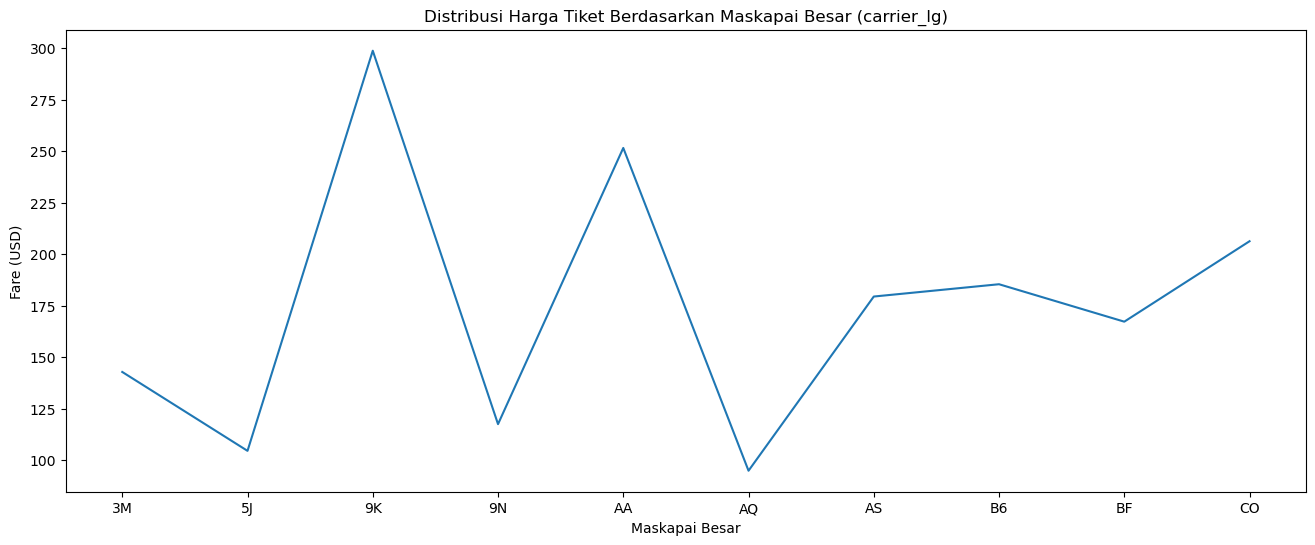

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


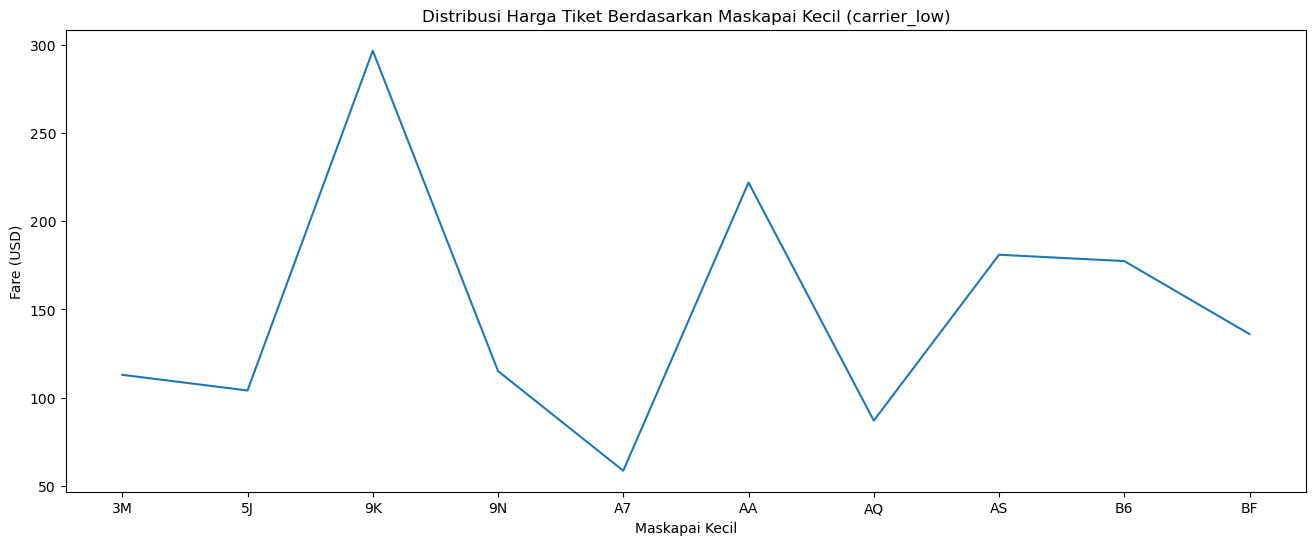

In [52]:
carrier_lg_fare = df.groupby('carrier_lg')['fare_lg'].mean().reset_index().head(10)
carrier_low_fare = df.groupby('carrier_low')['fare_low'].mean().reset_index().head(10)

plt.figure(figsize=(16, 6))
sns.lineplot(data=carrier_lg_fare, x='carrier_lg', y='fare_lg')
plt.title('Distribusi Harga Tiket Berdasarkan Maskapai Besar (carrier_lg)')
plt.xlabel('Maskapai Besar')
plt.ylabel('Fare (USD)')
plt.show()

plt.figure(figsize=(16, 6))
sns.lineplot(data=carrier_low_fare, x='carrier_low', y='fare_low')
plt.title('Distribusi Harga Tiket Berdasarkan Maskapai Kecil (carrier_low)')
plt.xlabel('Maskapai Kecil')
plt.ylabel('Fare (USD)')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


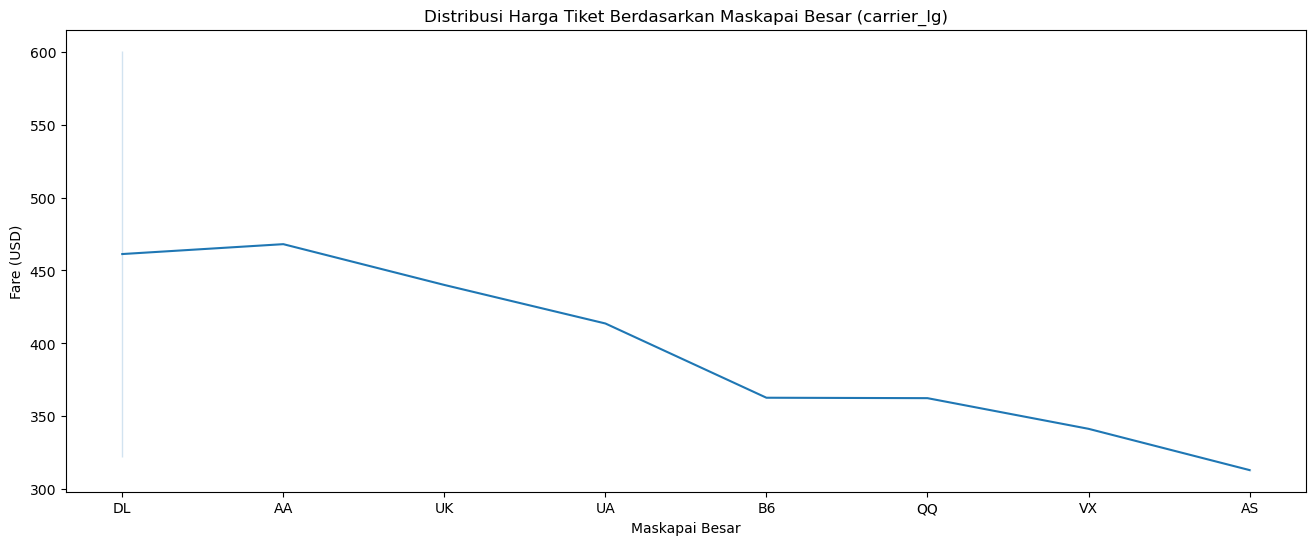

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


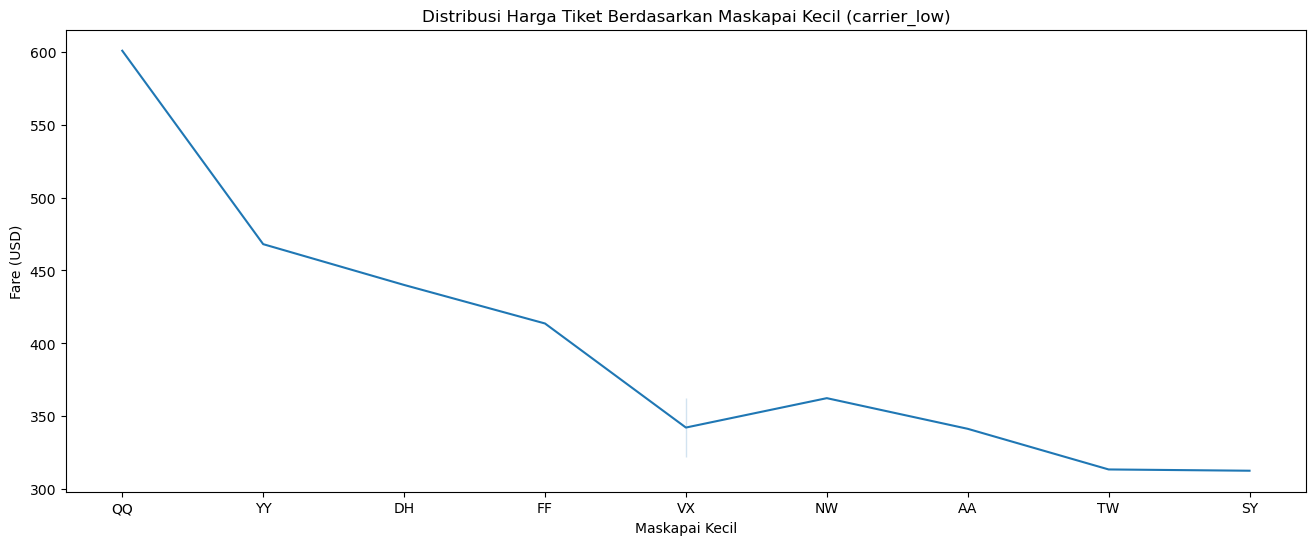

In [53]:
carrier_fare = df.groupby(['carrier_lg', 'carrier_low'])['fare'].mean().reset_index()
carrier_fare = carrier_fare.nlargest(10,'fare')

plt.figure(figsize=(16, 6))
sns.lineplot(data=carrier_fare, x='carrier_lg', y='fare')
plt.title('Distribusi Harga Tiket Berdasarkan Maskapai Besar (carrier_lg)')
plt.xlabel('Maskapai Besar')
plt.ylabel('Fare (USD)')
plt.show()

plt.figure(figsize=(16, 6))
sns.lineplot(data=carrier_fare, x='carrier_low', y='fare')
plt.title('Distribusi Harga Tiket Berdasarkan Maskapai Kecil (carrier_low)')
plt.xlabel('Maskapai Kecil')
plt.ylabel('Fare (USD)')
plt.show()

### Fare dan city1/city2

<function matplotlib.pyplot.show(close=None, block=None)>

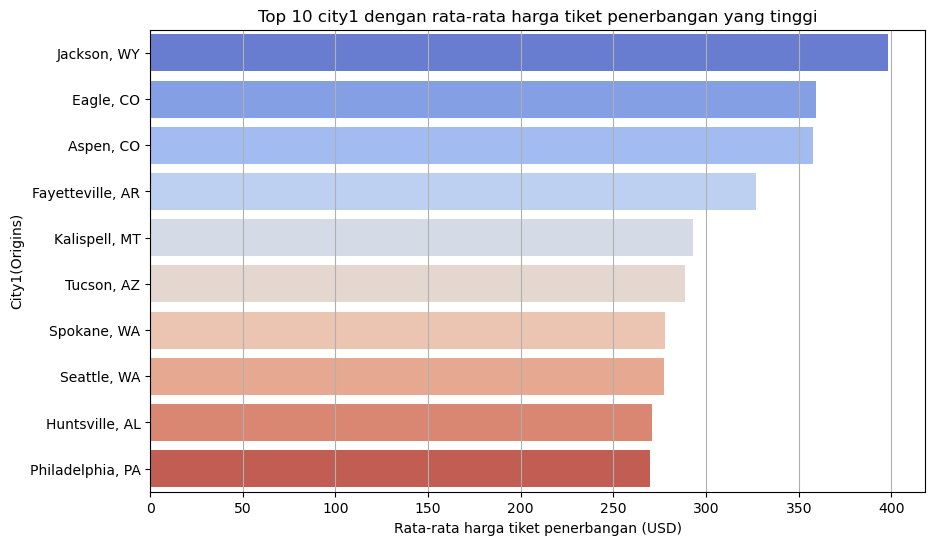

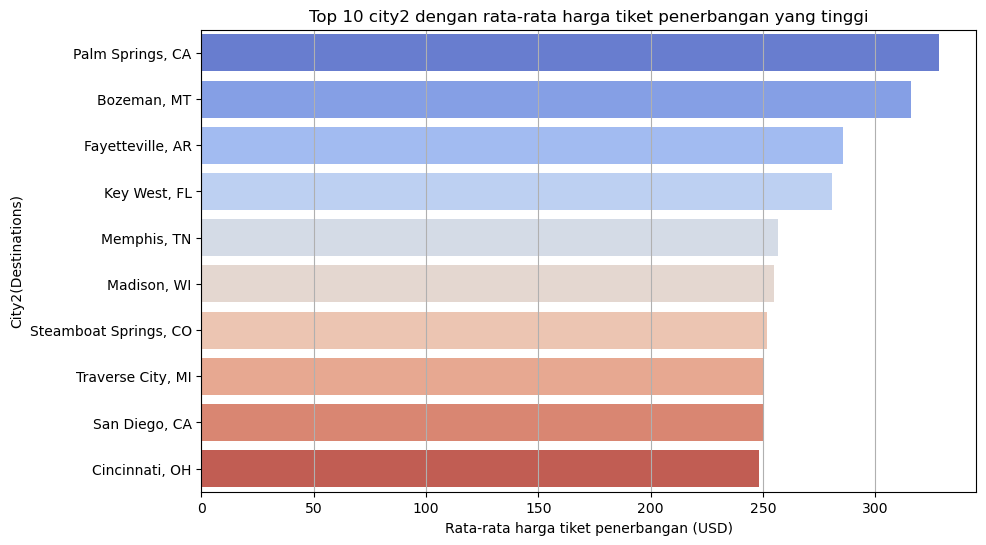

In [14]:

# Top 10 City1 by Average Fare
city1_fare = df.groupby('city1')['fare'].mean().reset_index().nlargest(10,'fare')

plt.figure(figsize = (10,6))
sns.barplot(data = city1_fare, x = 'fare', y = 'city1', palette = 'coolwarm')
plt.title ('Top 10 city1 dengan rata-rata harga tiket penerbangan yang tinggi')
plt.xlabel ('Rata-rata harga tiket penerbangan (USD)')
plt.ylabel ('City1(Origins)')
plt.grid(axis = 'x')
plt.show

# Top 10 City2 by Average Fare
city2_fare = df.groupby('city2')['fare'].mean().reset_index().nlargest(10,'fare')

plt.figure(figsize = (10,6))
sns.barplot(data = city2_fare, x = 'fare', y = 'city2', palette = 'coolwarm')
plt.title ('Top 10 city2 dengan rata-rata harga tiket penerbangan yang tinggi')
plt.xlabel ('Rata-rata harga tiket penerbangan (USD)')
plt.ylabel ('City2(Destinations)')
plt.grid(axis = 'x')
plt.show

### Fare dan Passengers

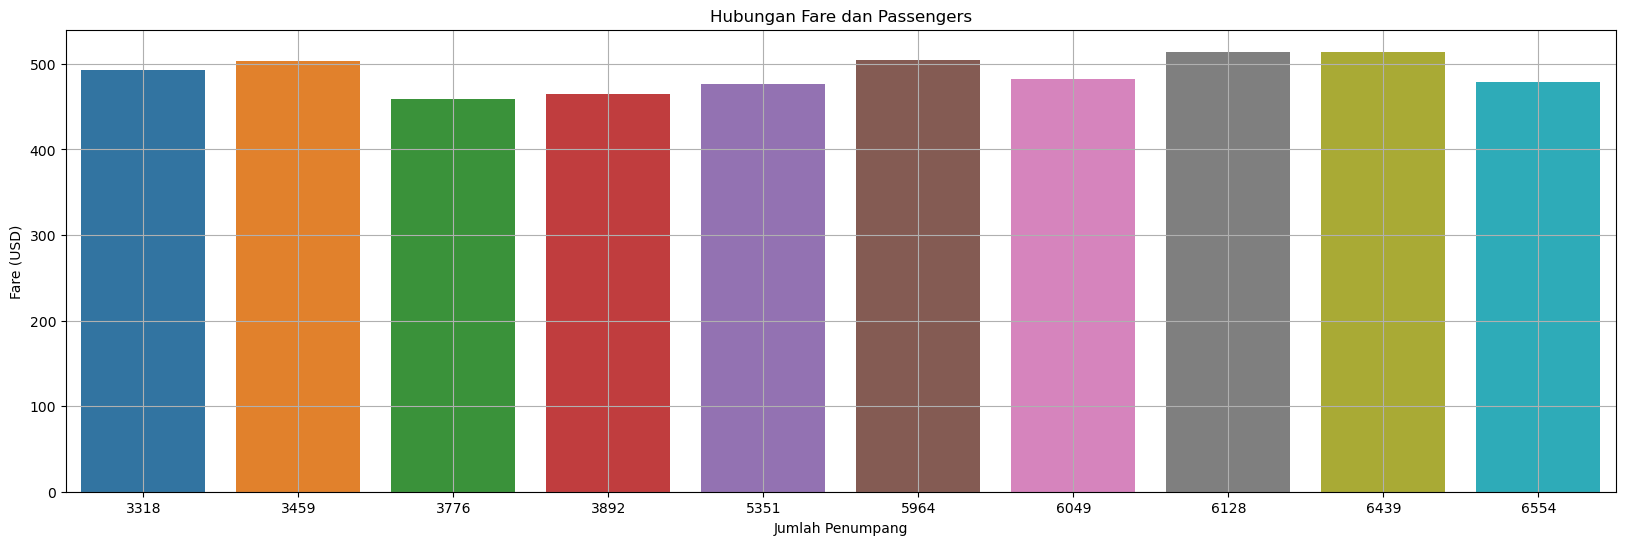

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


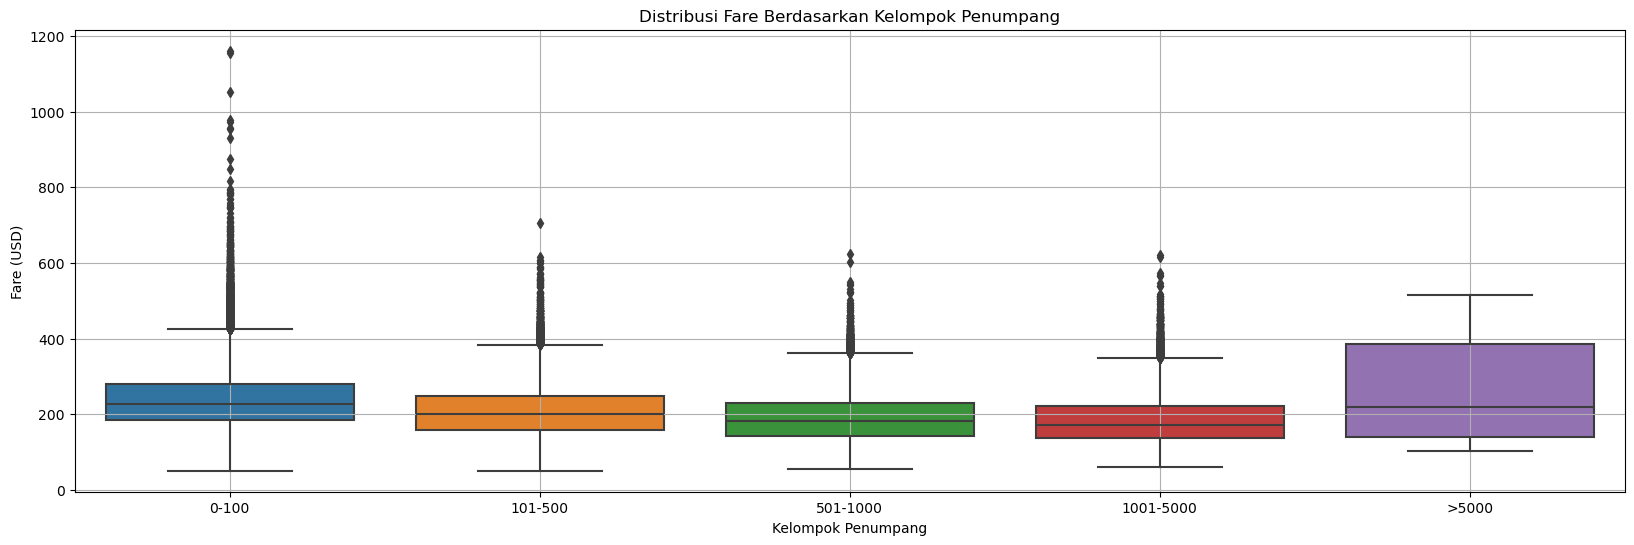

Pearson Correlation Coefficient: -0.17


In [57]:
grouping_Passangers = df.groupby('passengers')['fare'].mean().reset_index().nlargest(10,'fare')

plt.figure(figsize=(20, 6))
sns.barplot(data=grouping_Passangers, x='passengers', y='fare')
plt.title('Hubungan Fare dan Passengers')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Fare (USD)')
plt.grid()
plt.show()

df['passenger_group'] = pd.cut(df['passengers'], bins=[0, 100, 500, 1000, 5000, 10000],
                               labels=['0-100', '101-500', '501-1000', '1001-5000', '>5000'])

plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='passenger_group', y='fare')
plt.title('Distribusi Fare Berdasarkan Kelompok Penumpang')
plt.xlabel('Kelompok Penumpang')
plt.ylabel('Fare (USD)')
plt.grid()
plt.show()


In [11]:
print(df['passengers'].mean())

299.4767945355858


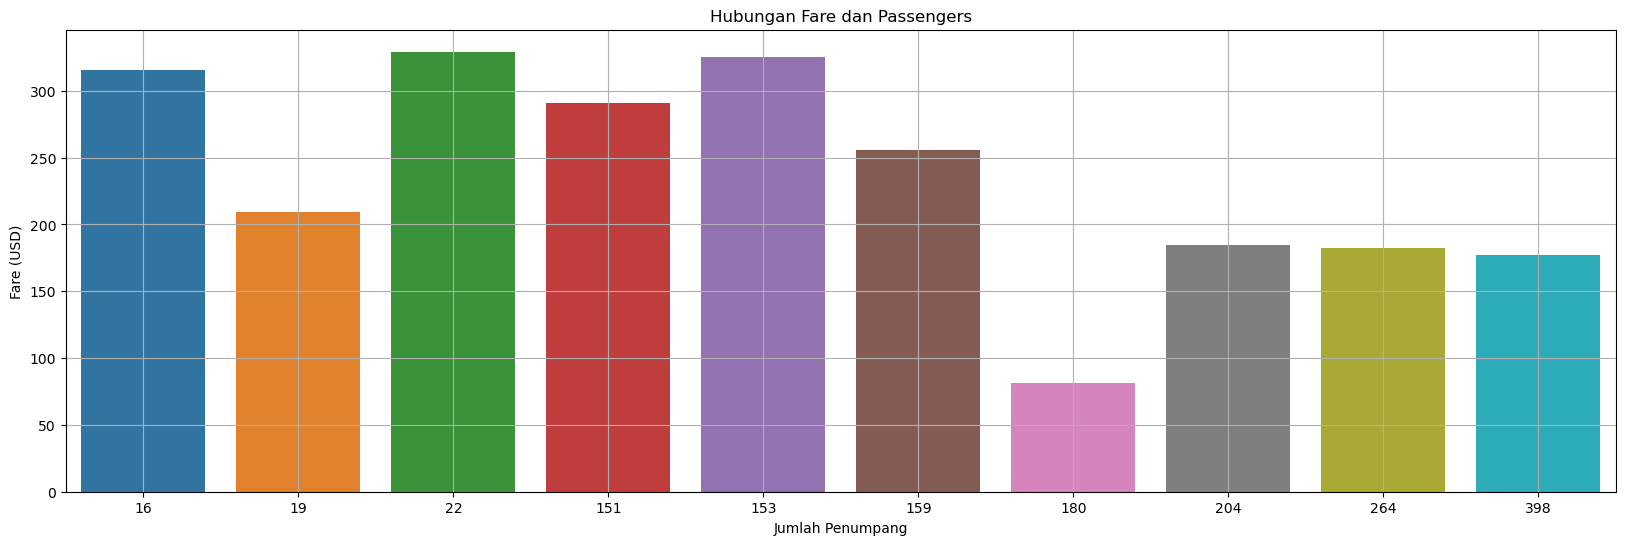

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


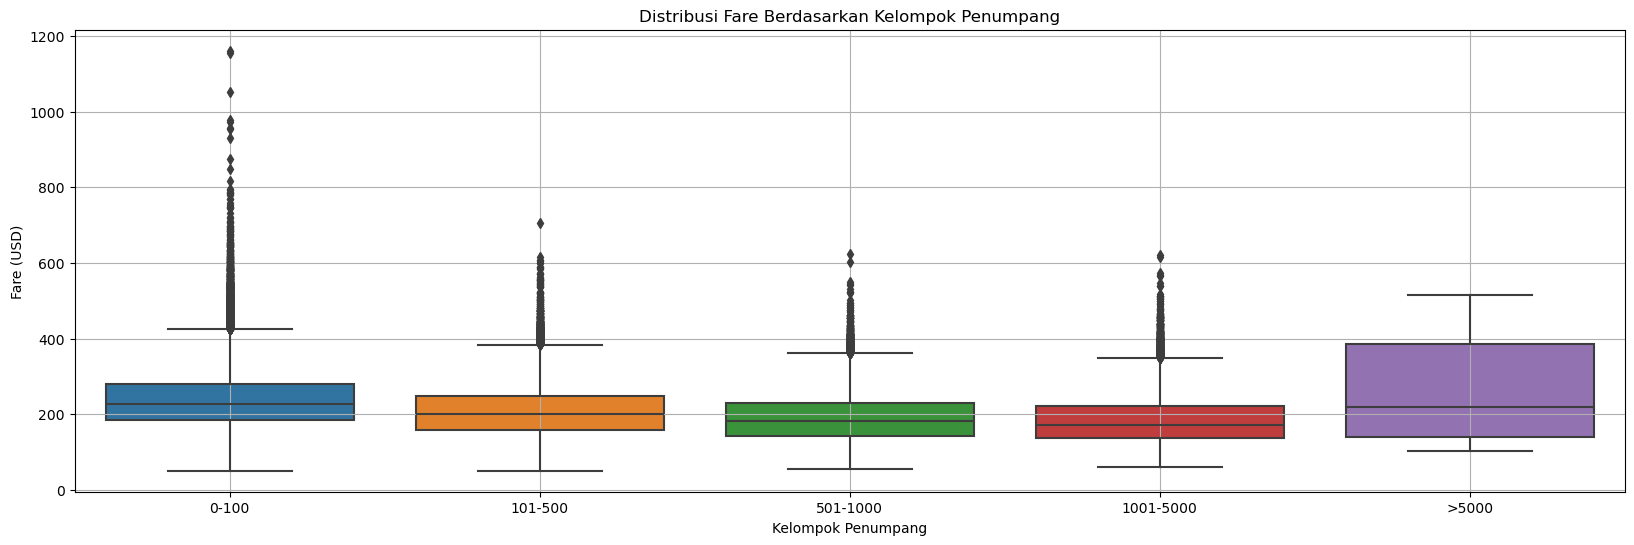

Pearson Correlation Coefficient: -0.17


In [58]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df.head(10), x='passengers', y='fare')
plt.title('Hubungan Fare dan Passengers')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Fare (USD)')
plt.grid()
plt.show()

# Boxplot berdasarkan kelompok jumlah penumpang
df['passenger_group'] = pd.cut(df['passengers'], bins=[0, 100, 500, 1000, 5000, 10000],
                               labels=['0-100', '101-500', '501-1000', '1001-5000', '>5000'])

plt.figure(figsize=(20, 6))
sns.boxplot(data=df, x='passenger_group', y='fare')
plt.title('Distribusi Fare Berdasarkan Kelompok Penumpang')
plt.xlabel('Kelompok Penumpang')
plt.ylabel('Fare (USD)')
plt.grid()
plt.show()

from scipy.stats import pearsonr
correlation, _ = pearsonr(df['passengers'], df['fare'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

### Fare dan nsmiles

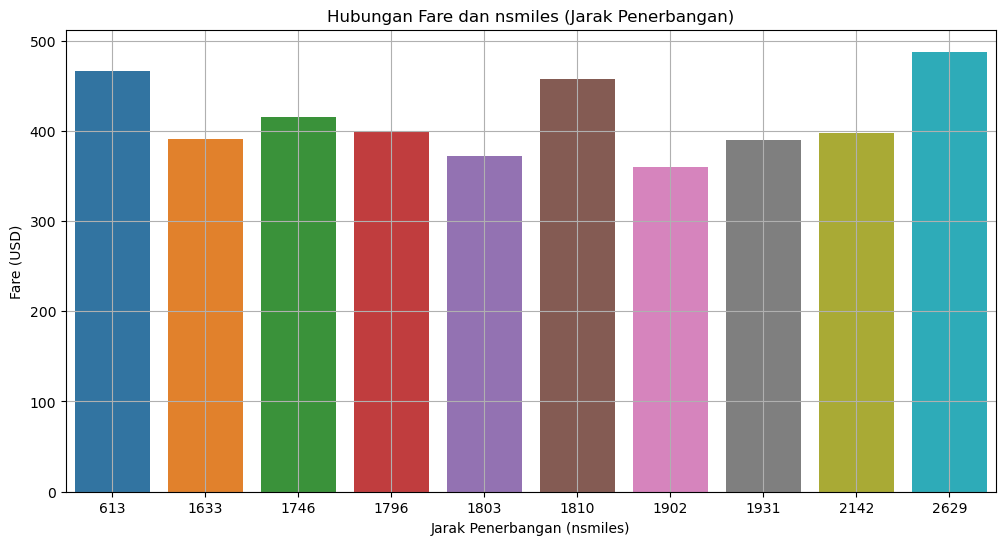

Pearson Correlation Coefficient: 0.50


In [60]:
top_nsmiles = df.groupby('nsmiles')['fare'].mean().reset_index().nlargest(10,'fare')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_nsmiles, x='nsmiles', y='fare',)
plt.title('Hubungan Fare dan nsmiles (Jarak Penerbangan)')
plt.xlabel('Jarak Penerbangan (nsmiles)')
plt.ylabel('Fare (USD)')
plt.grid()
plt.show()

# Korelasi antara Fare dan nsmiles
from scipy.stats import pearsonr
correlation, _ = pearsonr(df['nsmiles'], df['fare'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")

In [61]:
print(df['nsmiles'].mean())

1189.812319326706


In [62]:
top_nsmiles = df.groupby('nsmiles')['fare'].mean().reset_index().nlargest(10,'fare')

top_nsmiles

nsmiles        fare
1150     2629  487.567500
287       613  466.480000
944      1810  457.124583
917      1746  415.280676
939      1796  398.735000
1049     2142  397.281250
883      1633  391.130000
982      1931  390.189000
941      1803  372.231333
970      1902  360.347963

## now lets do some in depth analysis for some column
### first up is carrier_lg and carrier_low

now first up we do some analysis on beetween airline and passangers

Jumlah data Large Carriers per tahun:
 Year
1993    9666
1994    2390
1996    8724
1997    8583
1998    8633
1999    8699
2000    8504
2001    8596
2002    8548
2003    8449
2004    8428
2005    8344
2006    8175
2007    7972
2008    8074
2009    8087
2010    8095
2011    8121
2012    8206
2013    8276
2014    8214
2015    8133
2016    8217
2017    8220
2018    8185
2019    8139
2020    7514
2021    7755
2022    7803
2023    7766
2024    1899
Name: count, dtype: int64

Jumlah data Low-Cost Carriers per tahun:
 Year
1996    7
1997    5
2003    1
Name: count, dtype: int64


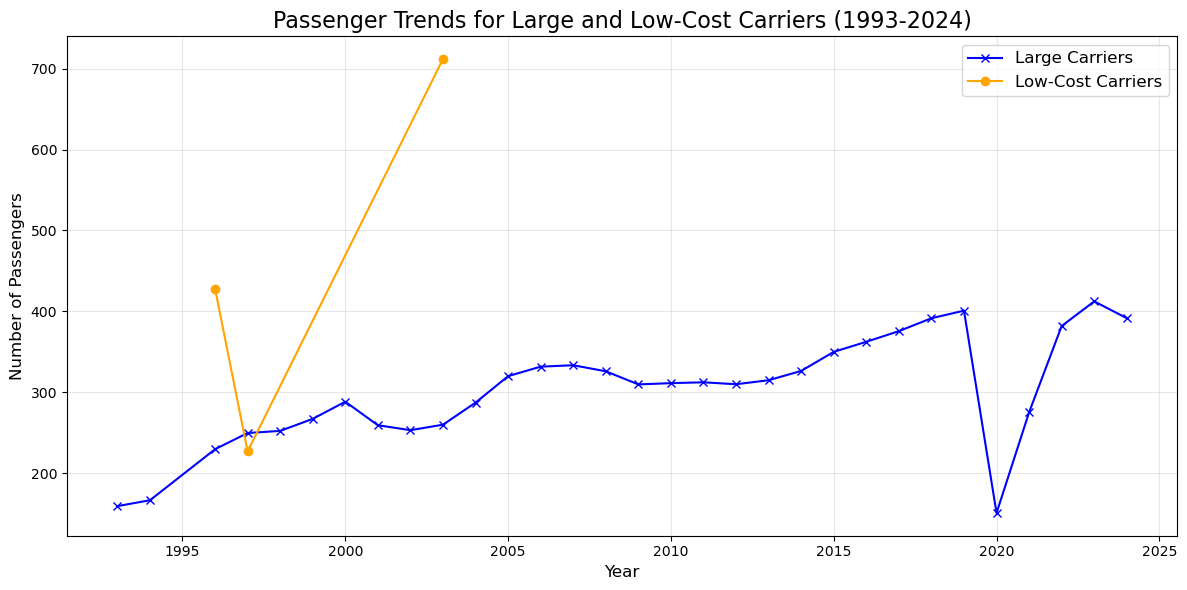

In [65]:
df_lg = df[df['carrier_lg'].notnull()]  # Large carriers where carrier_lg is not in carrier_low
df_low = df[~df['carrier_low'].isin(df['carrier_lg'])]  # Low-cost carriers where carrier_low is not in carrier_lg

# Step 3: Aggregate passenger data per year
df_lg_summary = df_lg.groupby('Year')['passengers'].mean().reset_index()
df_low_summary = df_low.groupby('Year')['passengers'].mean().reset_index()

df_lg_counts = df_lg['Year'].value_counts().sort_index()
df_low_counts = df_low['Year'].value_counts().sort_index()

print("Jumlah data Large Carriers per tahun:\n", df_lg_counts)
print("\nJumlah data Low-Cost Carriers per tahun:\n", df_low_counts)


# Step 4: Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_lg_summary['Year'], df_lg_summary['passengers'], label='Large Carriers', marker='x', color='blue')
plt.plot(df_low_summary['Year'], df_low_summary['passengers'], label='Low-Cost Carriers', marker='o', color='orange')

# Customizing the plot
plt.title('Passenger Trends for Large and Low-Cost Carriers (1993-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Quarter and passangers


   quarter  passengers
0        1  360.664190
1        2  416.113881
2        3  388.988894
3        4  397.670714


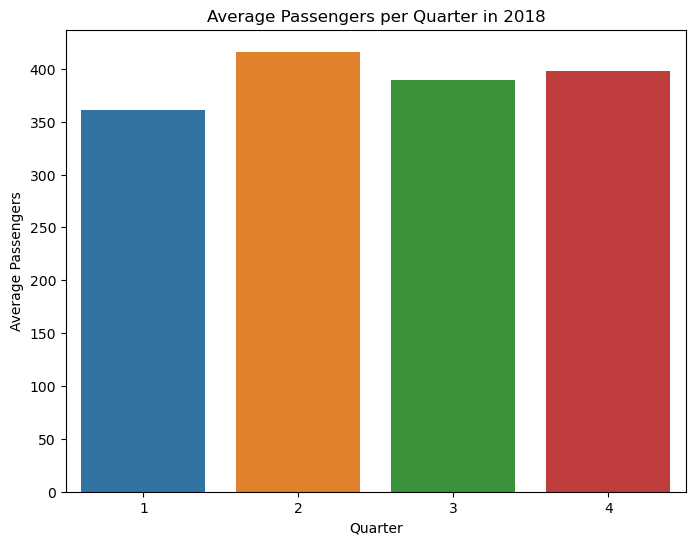

In [67]:
# prompt: i want to do analysis with quarter (with the year) and passanger with the same code earlier, i want only to see data on year 2018

# Filter data for the year 2018
df_2018 = df[df['Year'] == 2018]

# Group data by quarter and calculate the average number of passengers
quarter_passenger_2018 = df_2018.groupby('quarter')['passengers'].mean().reset_index()

# Print the result
print(quarter_passenger_2018)

# You can further visualize this data if needed
# For example:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(data=quarter_passenger_2018, x='quarter', y='passengers')
plt.title('Average Passengers per Quarter in 2018')
plt.xlabel('Quarter')
plt.ylabel('Average Passengers')
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


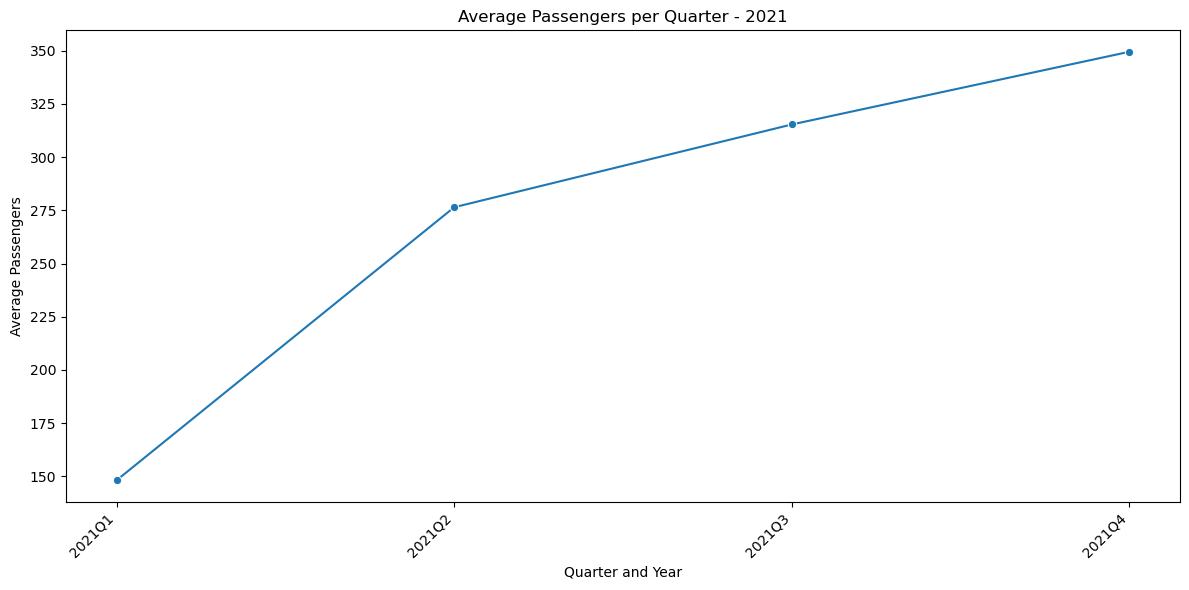

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


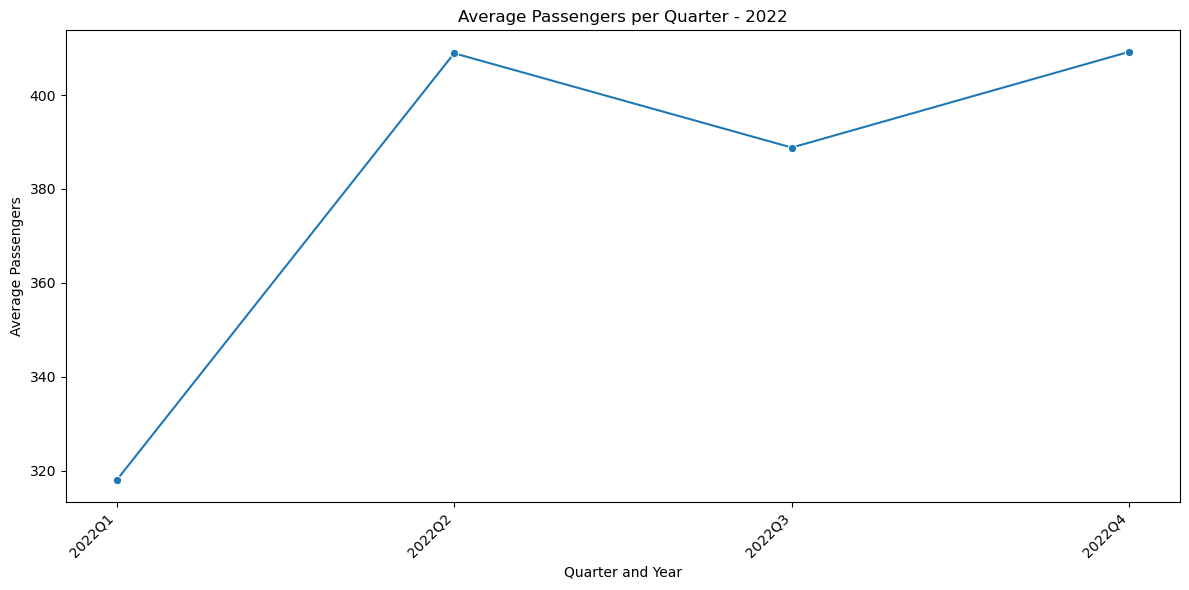

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


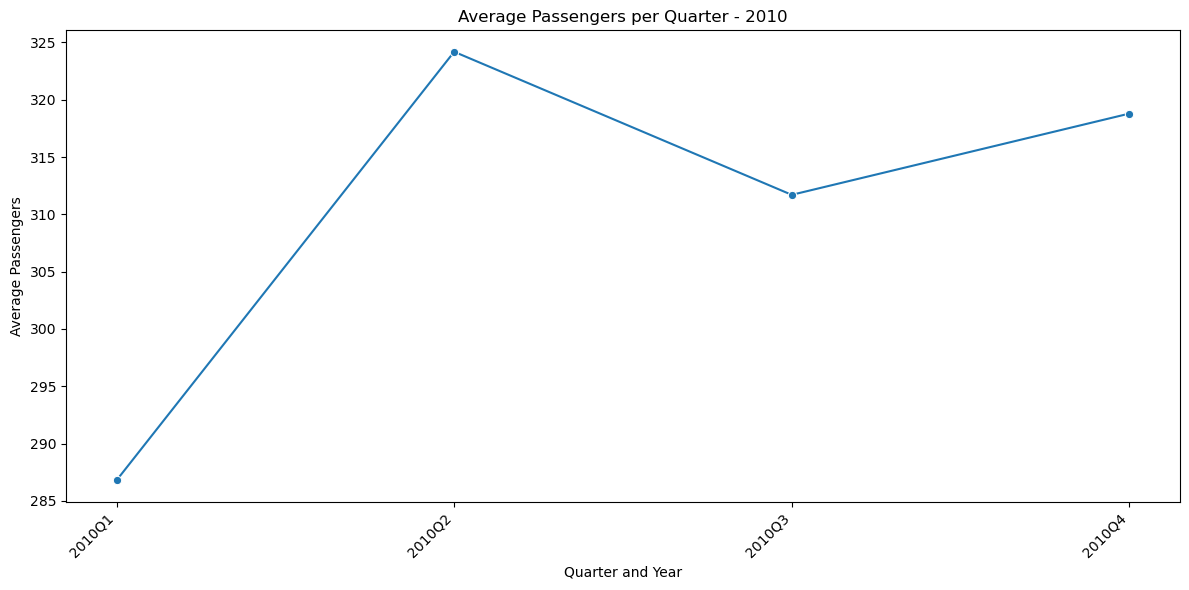

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


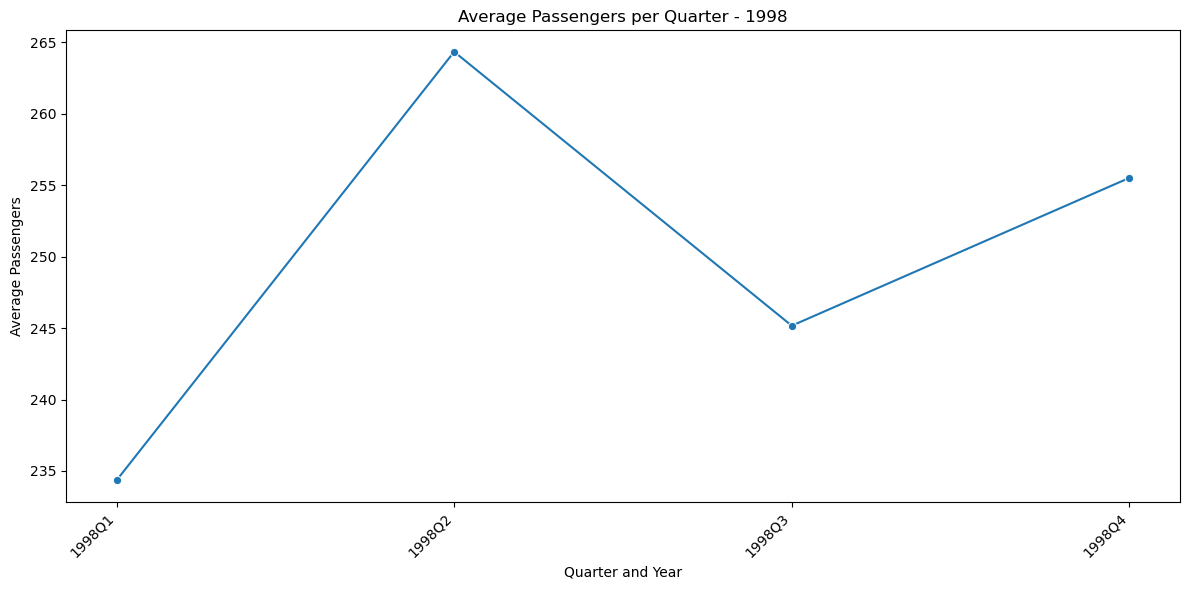

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


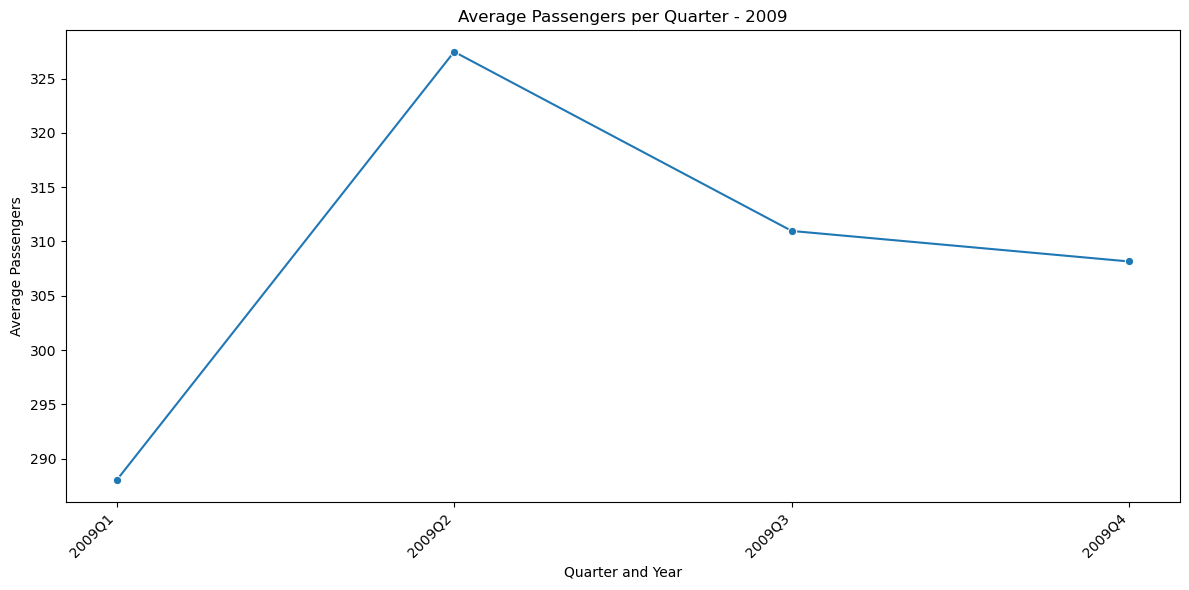

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


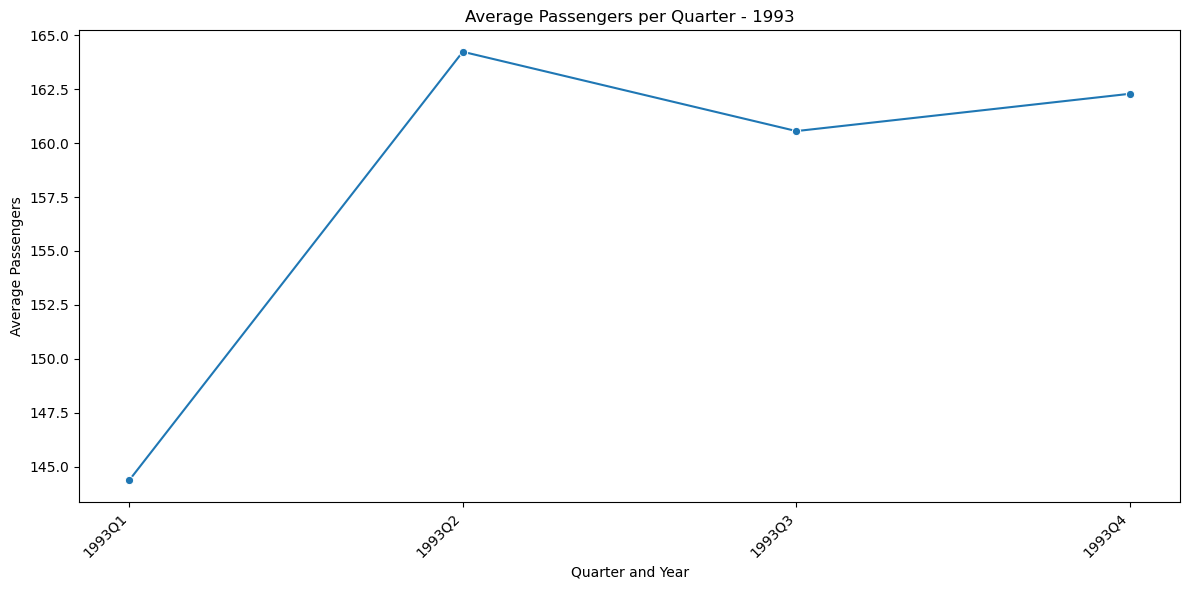

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


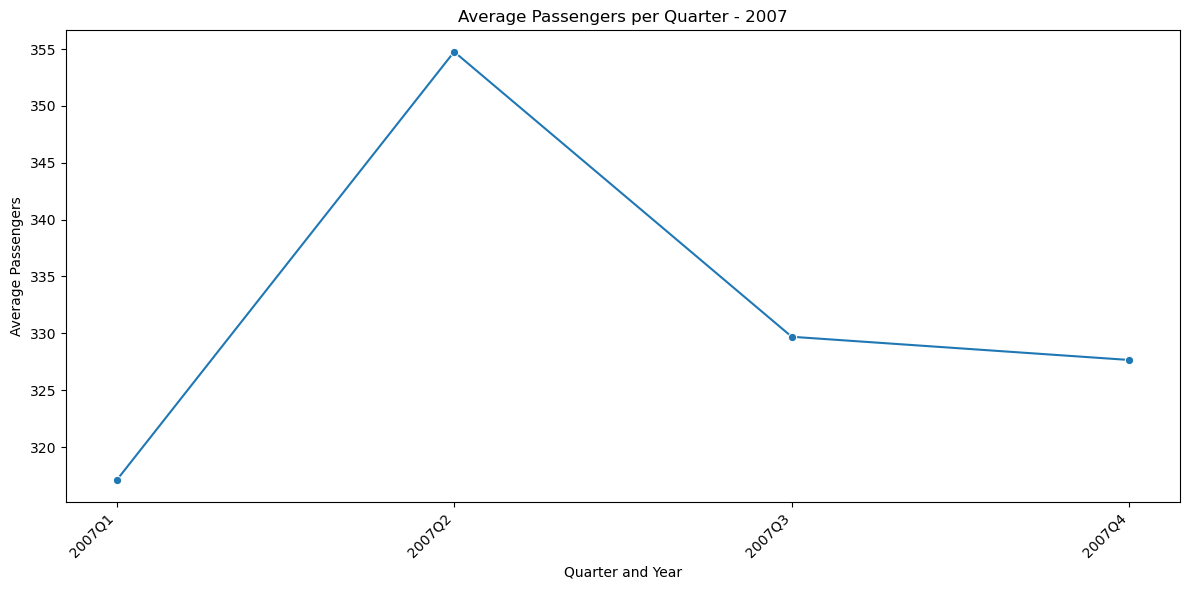

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


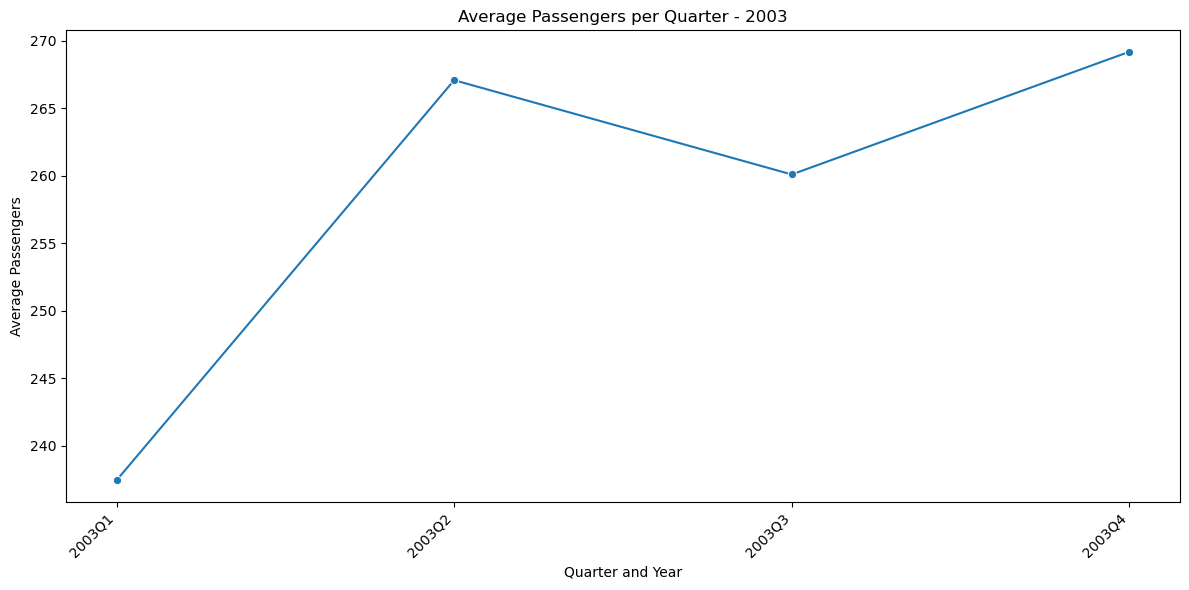

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


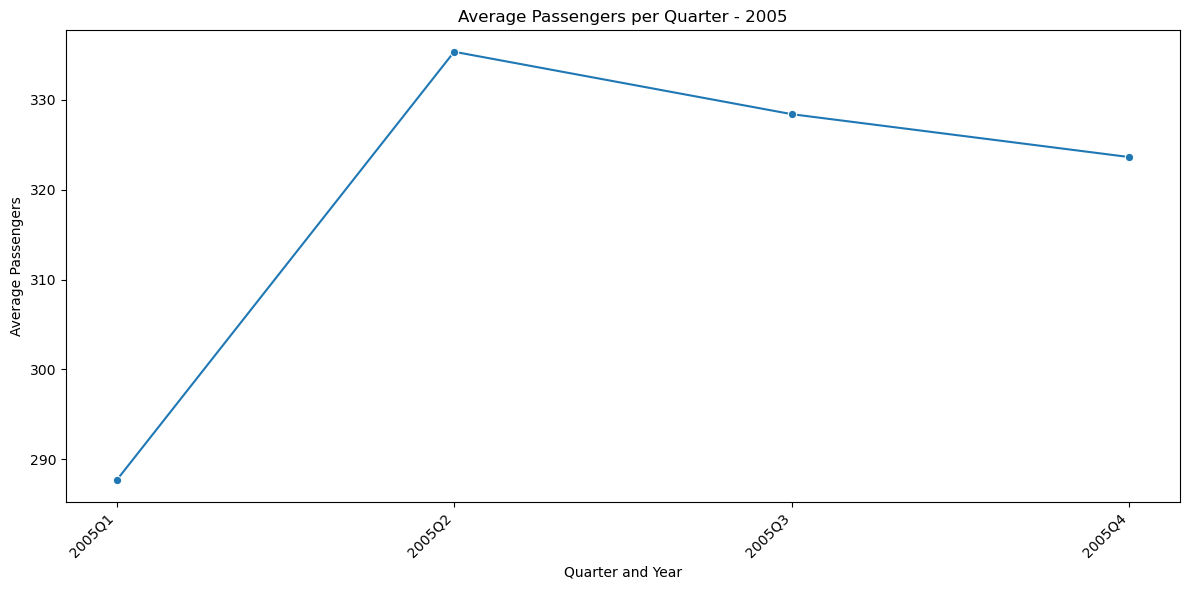

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


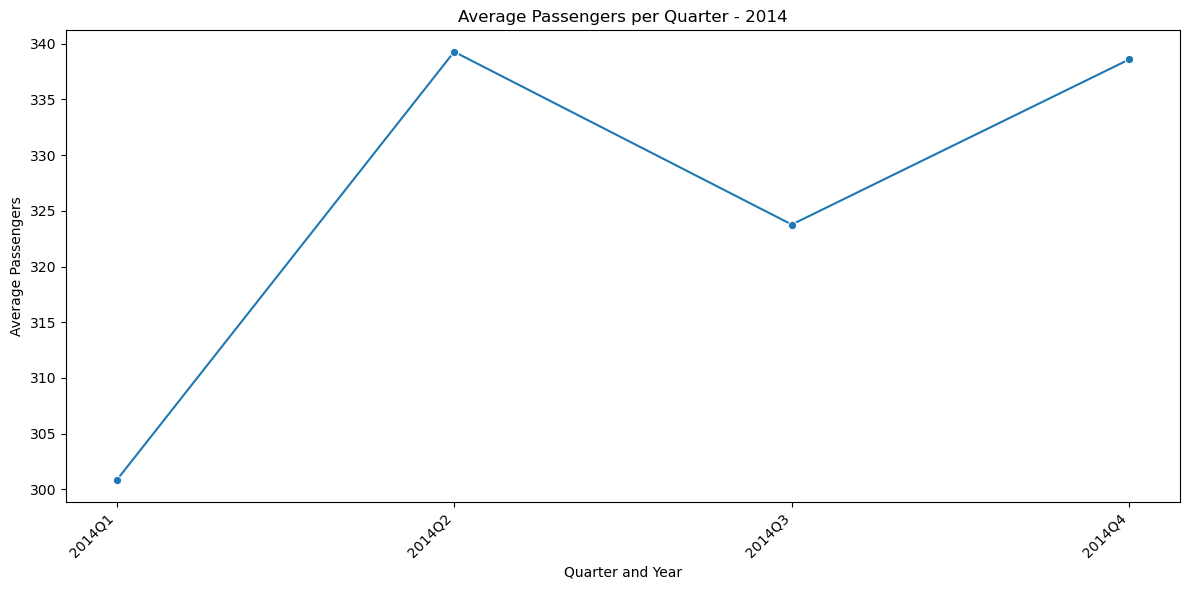

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


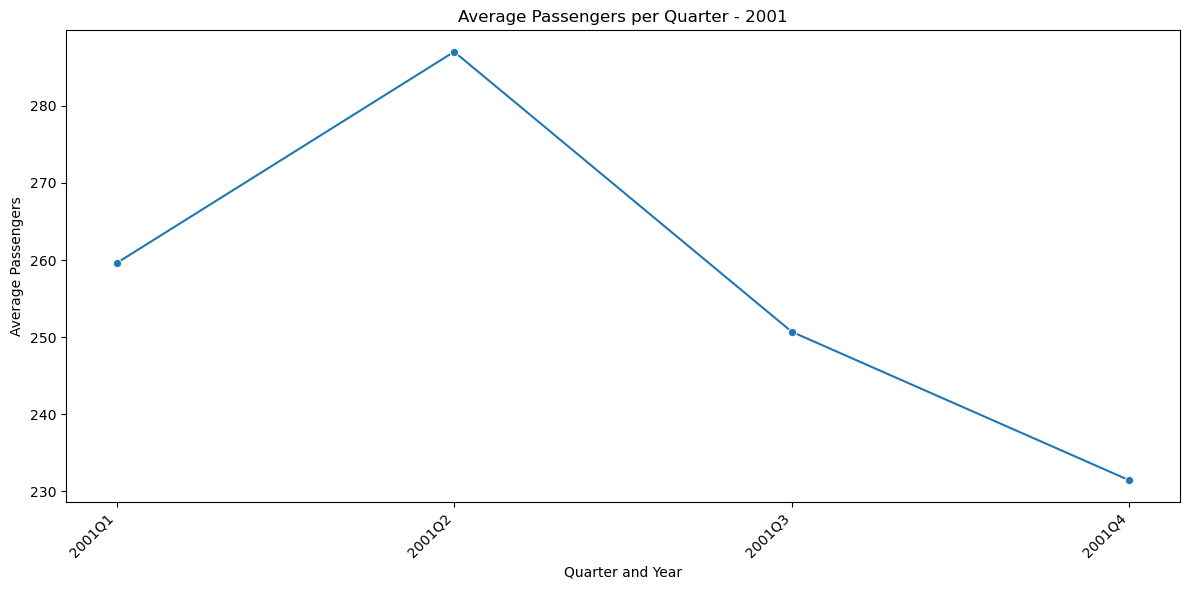

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


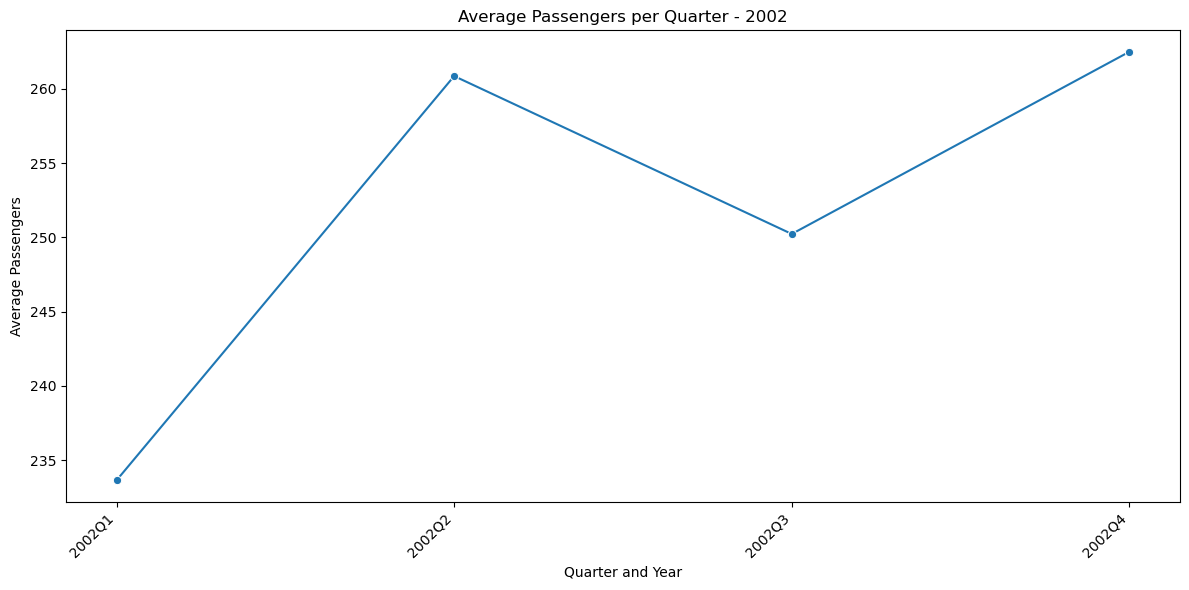

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


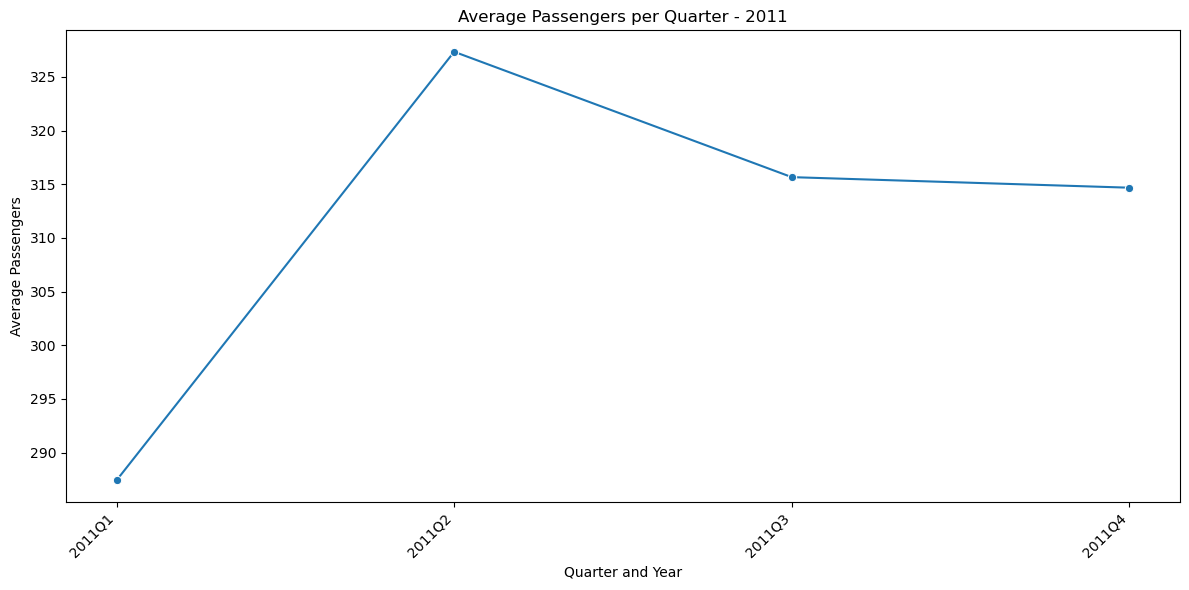

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


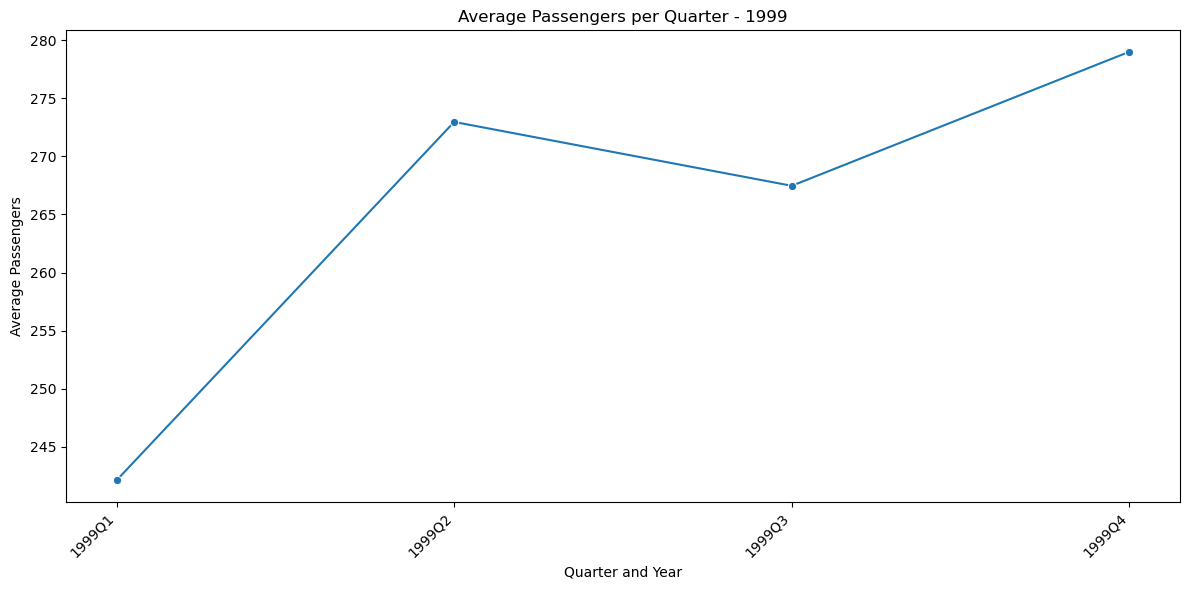

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


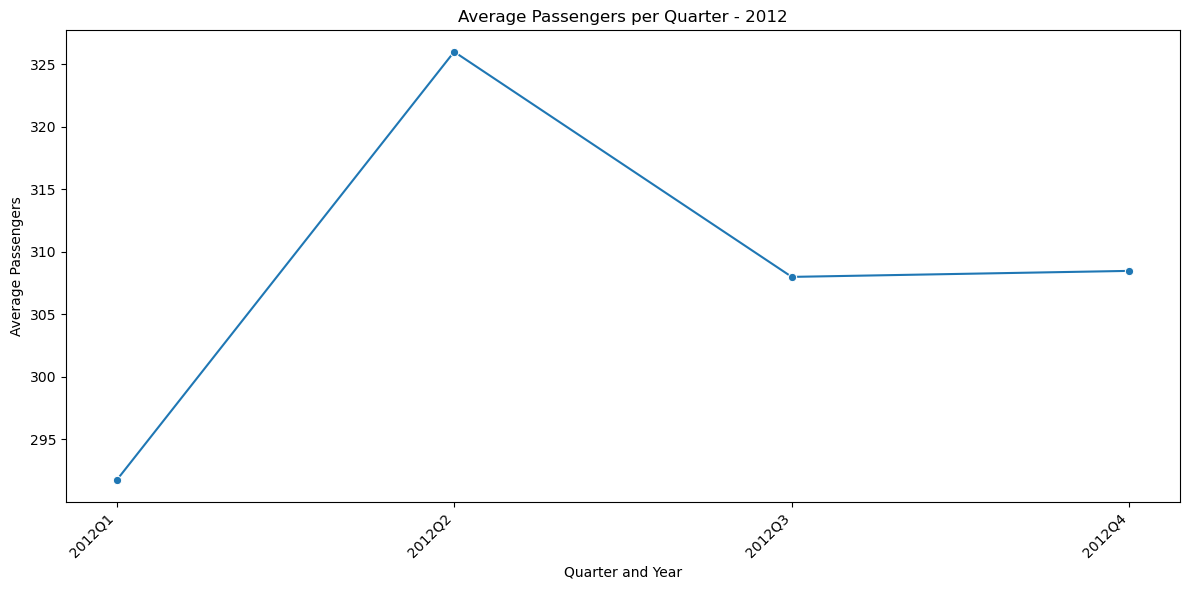

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


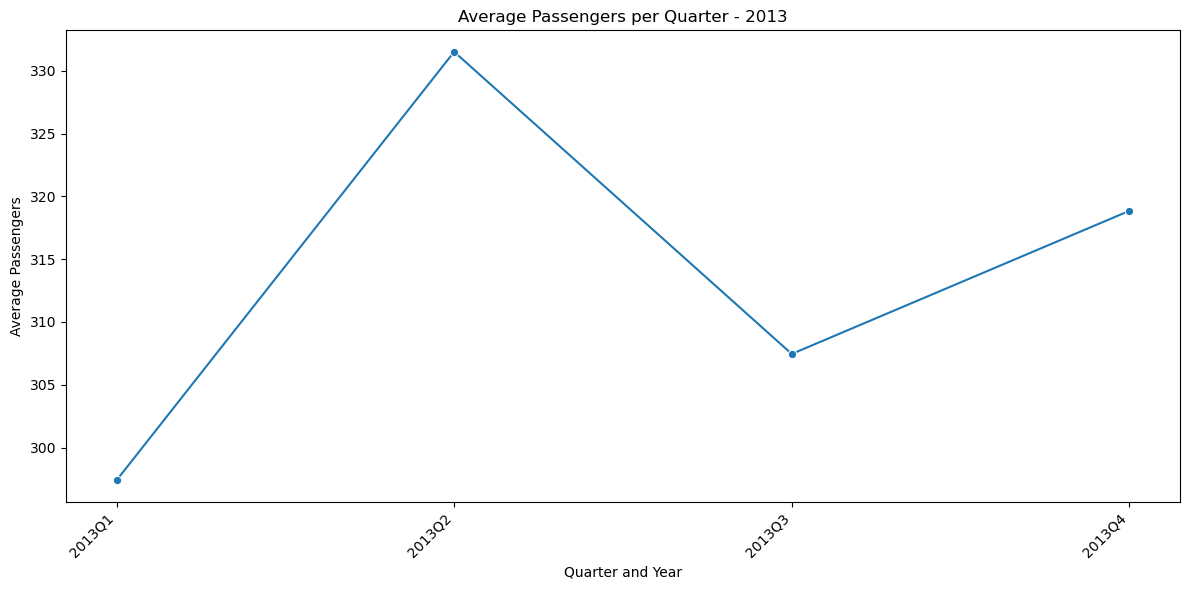

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


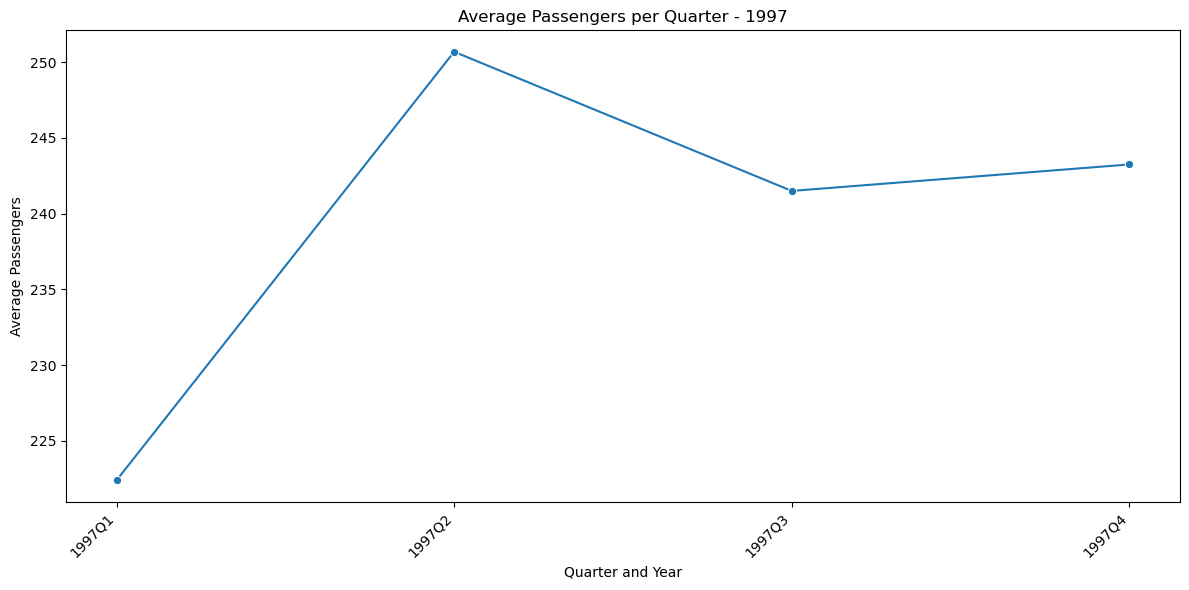

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


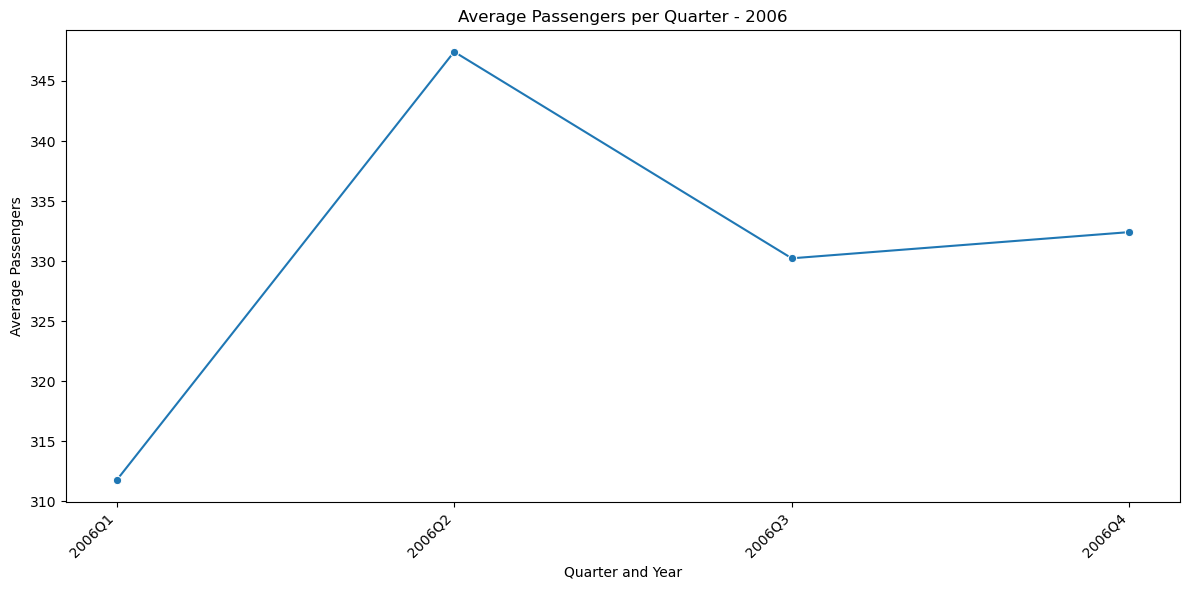

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


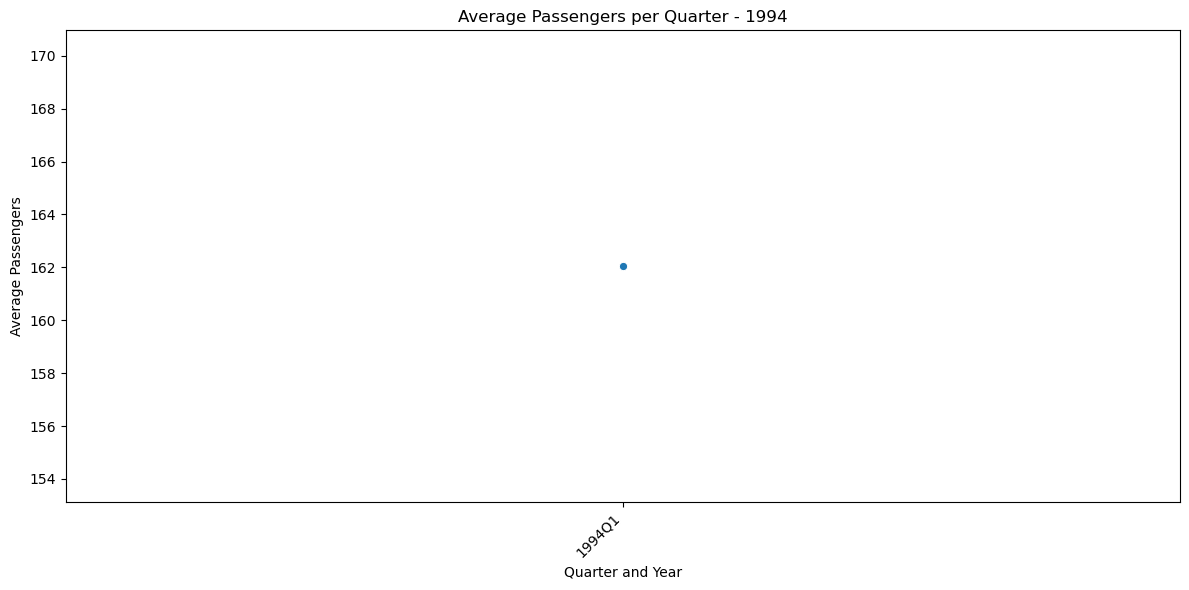

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


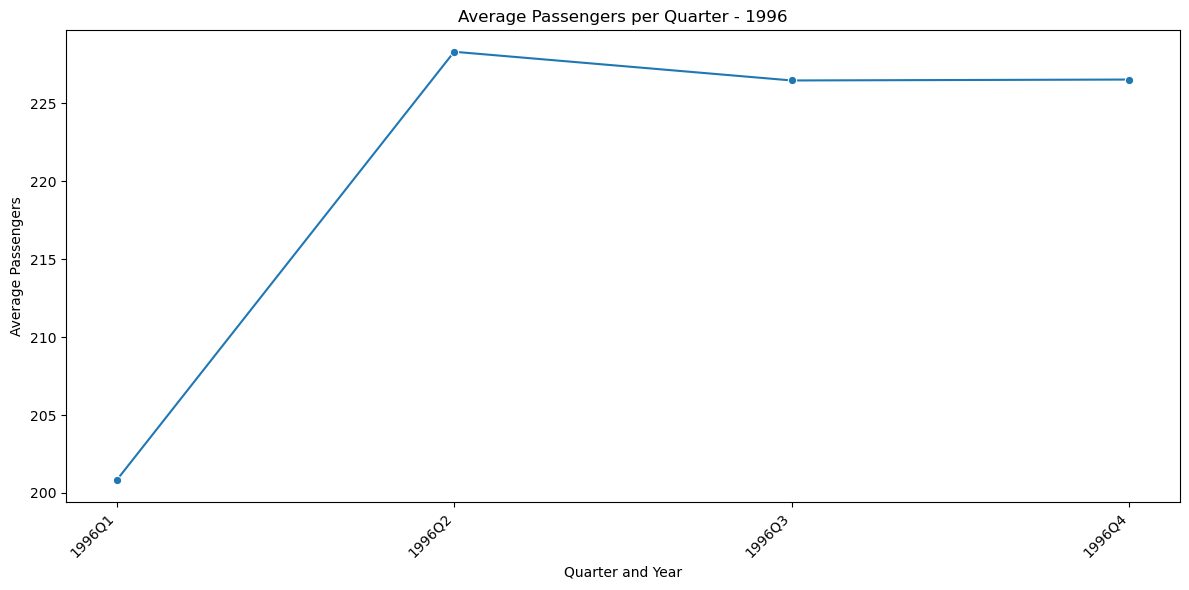

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


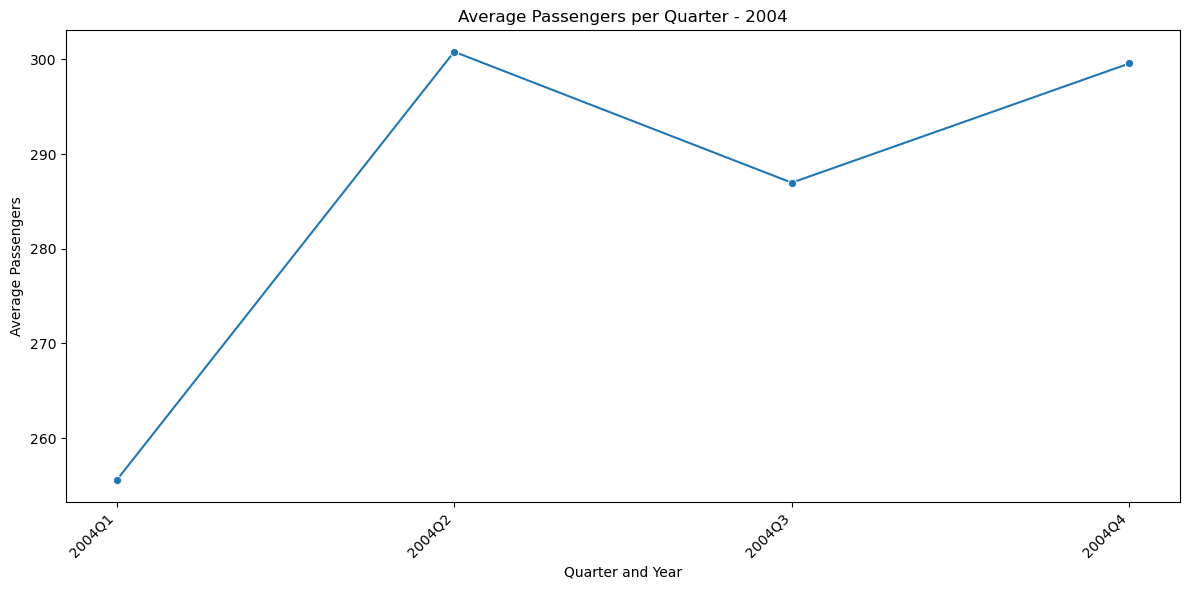

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


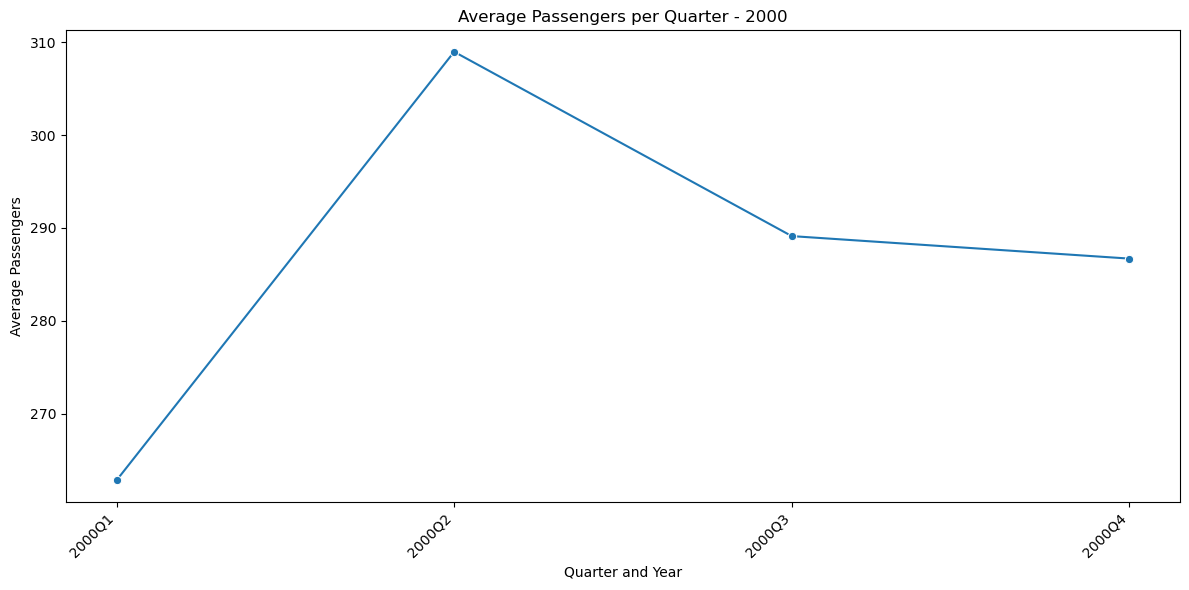

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


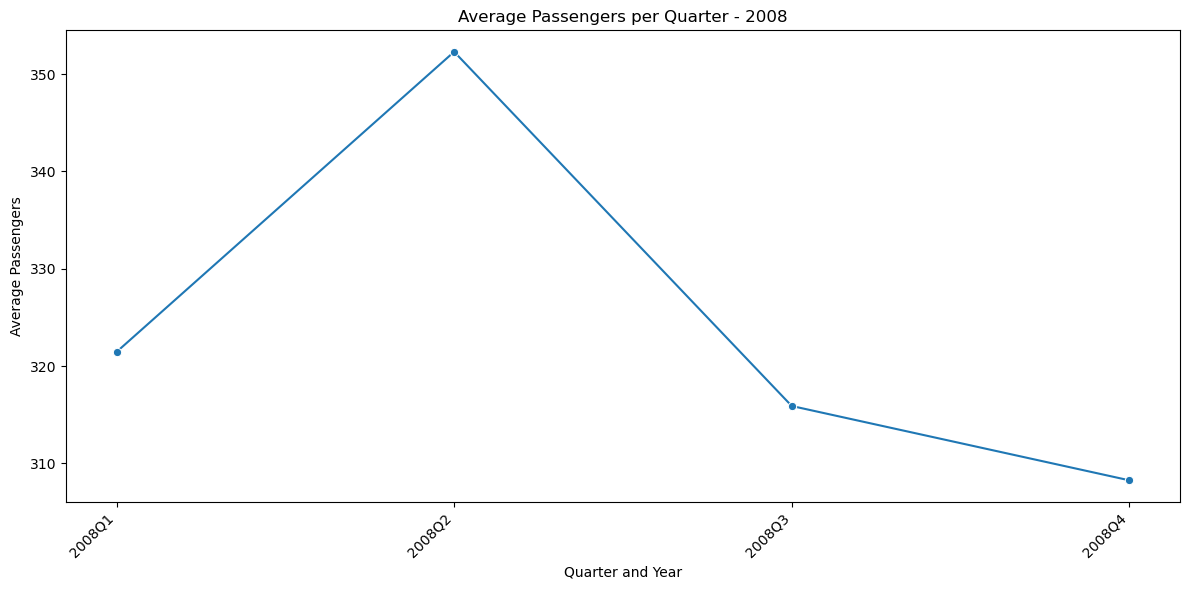

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


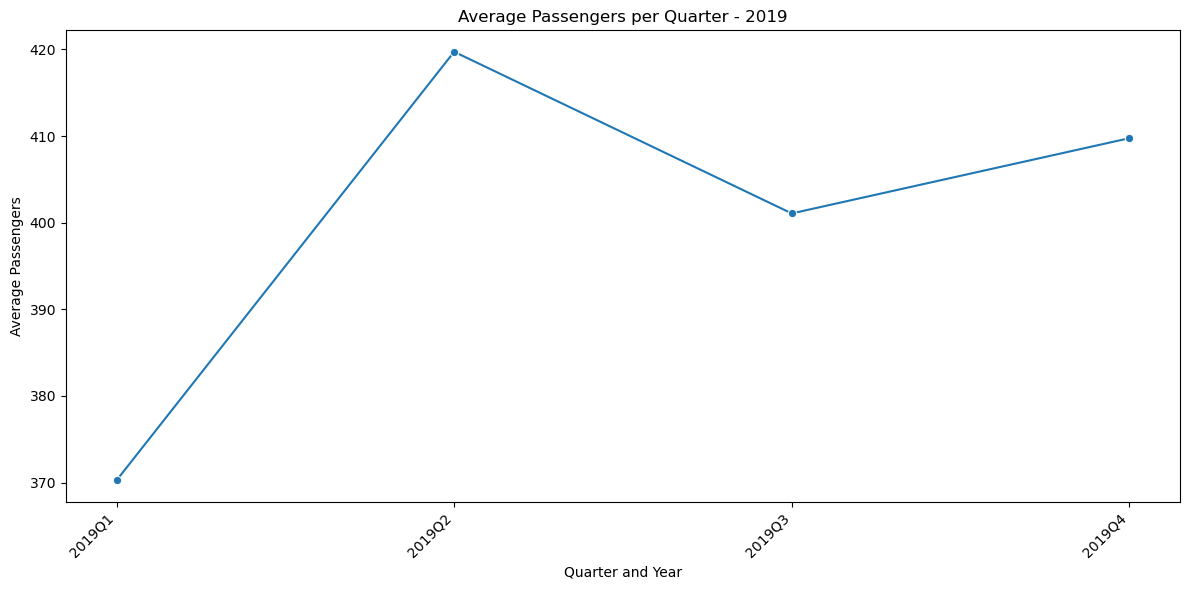

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


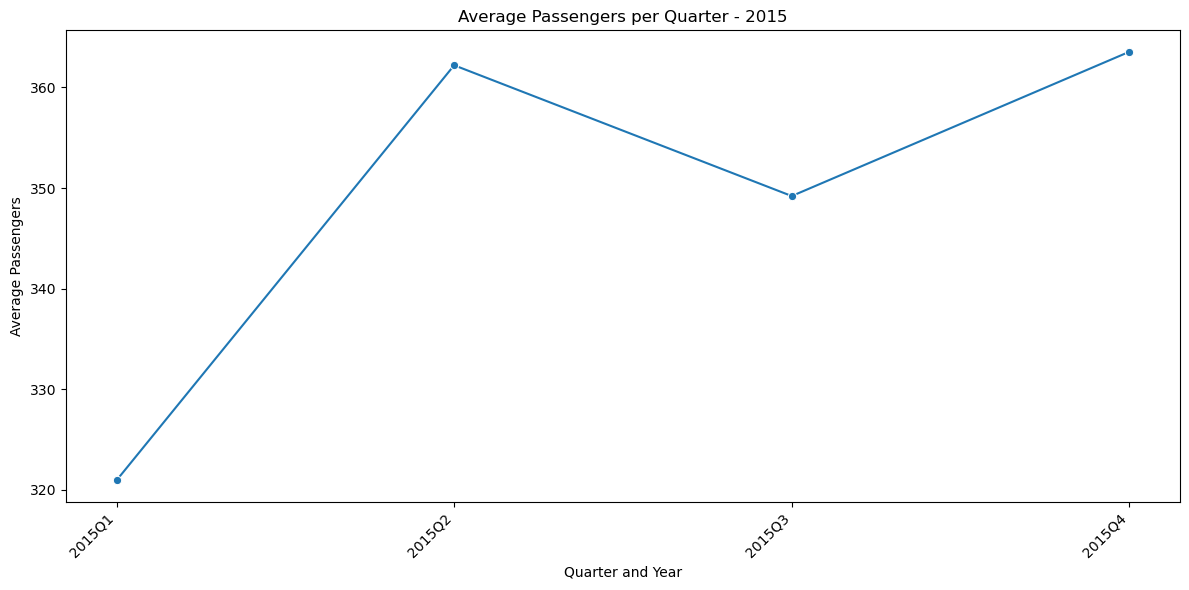

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


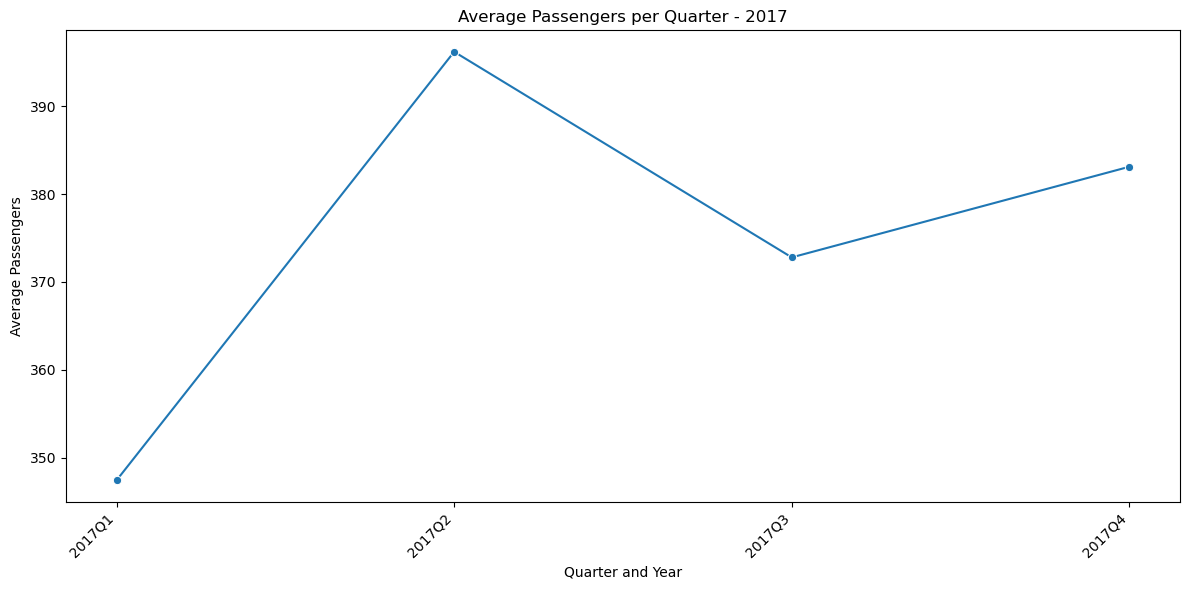

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


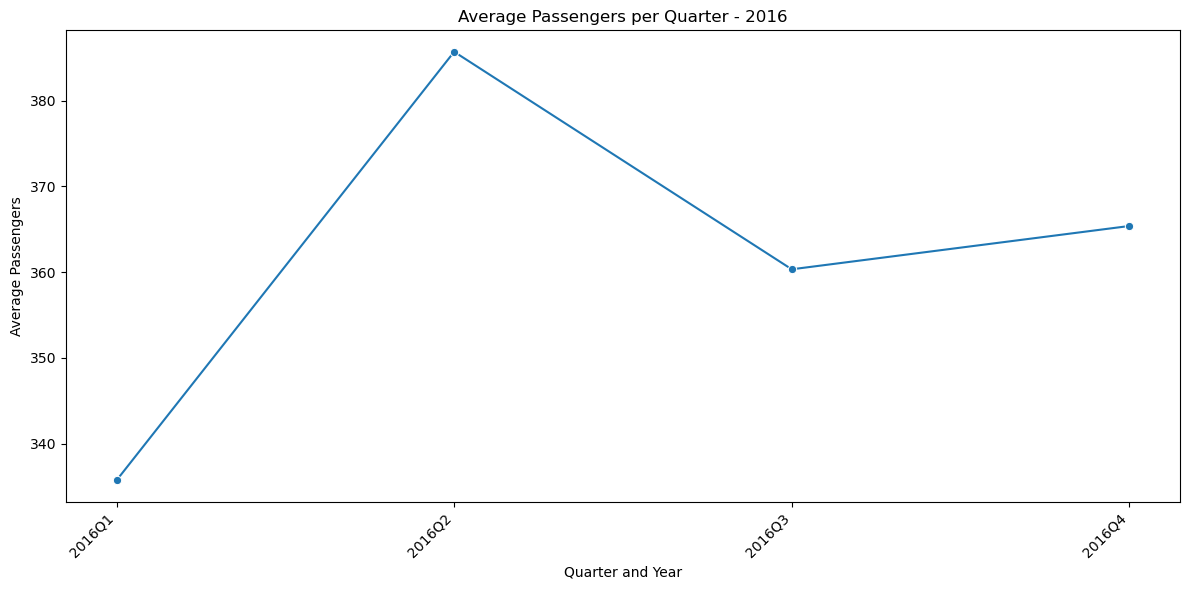

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


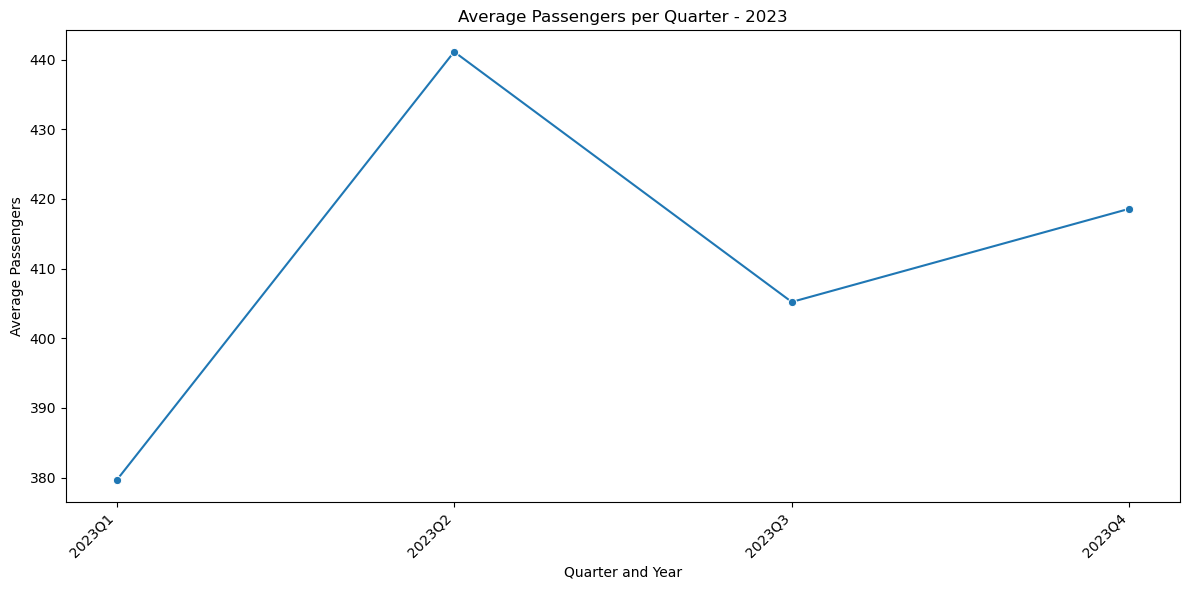

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


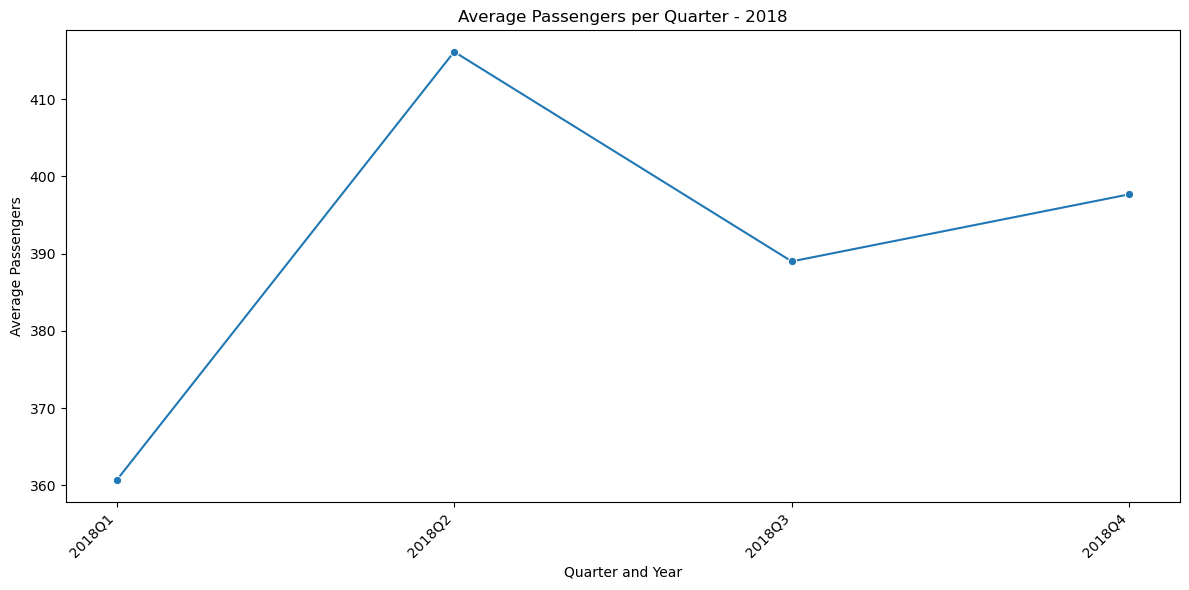

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


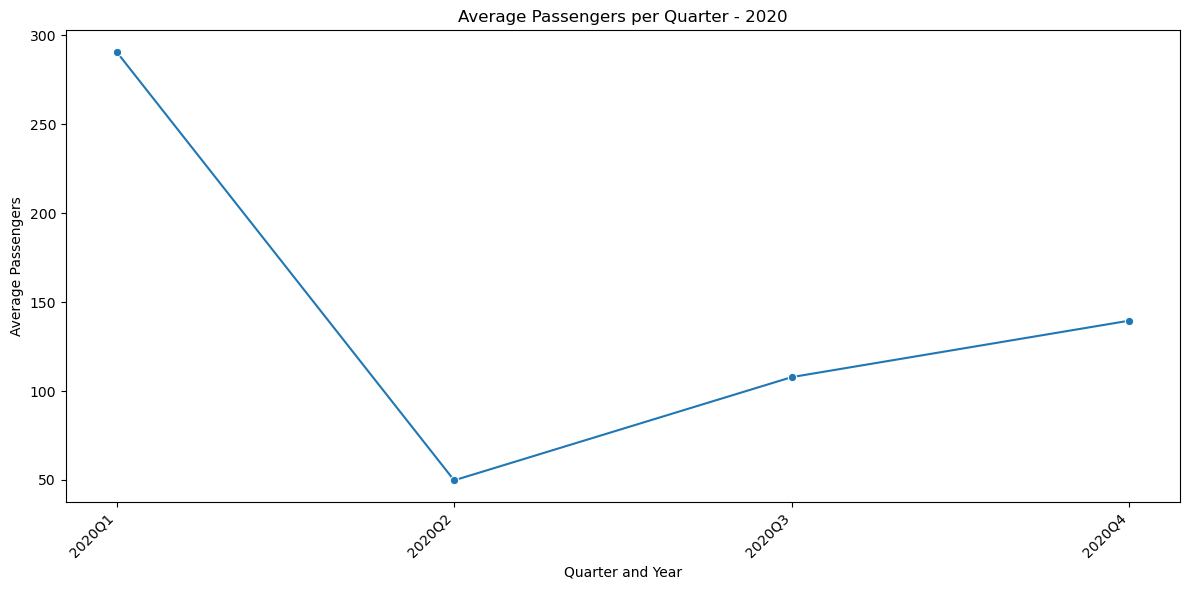

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


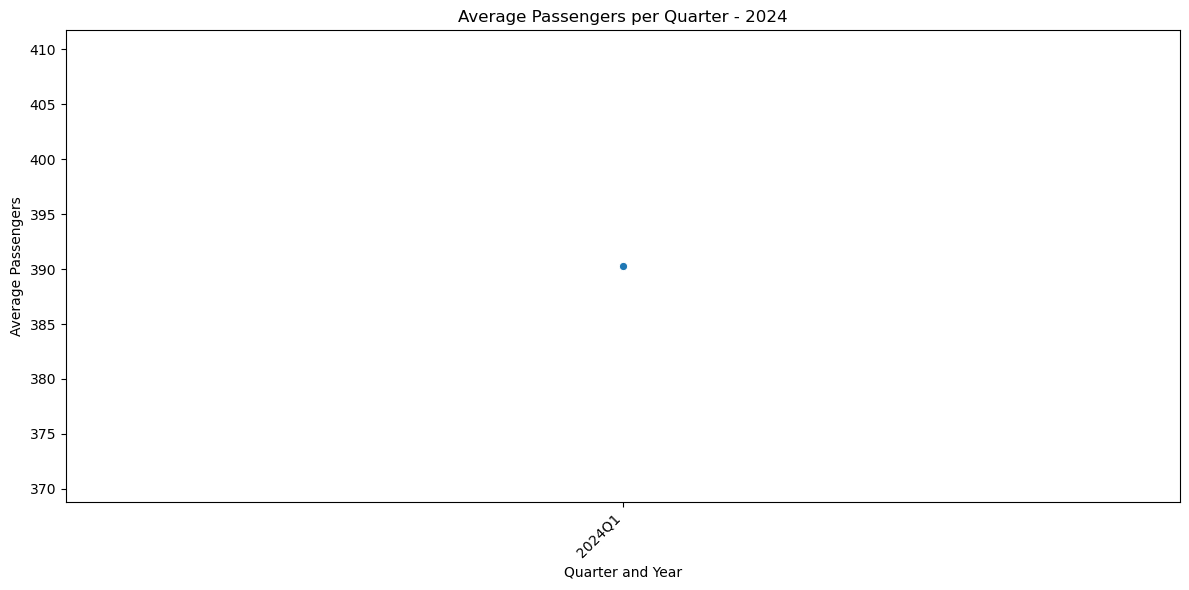

In [68]:
df['quarter_year'] = df['Year'].astype(str) + 'Q' + df['quarter'].astype(str)

# Extract unique years
unique_years = df['Year'].unique()

# Create a separate plot for each year
for year in unique_years:
    # Filter data for the current year
    df_year = df[df['Year'] == year]

    # Group by quarter_year and calculate the mean of passengers
    quarter_passenger = df_year.groupby('quarter_year')['passengers'].mean().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=quarter_passenger, x='quarter_year', y='passengers', marker='o')
    plt.title(f'Average Passengers per Quarter - {year}')  # Specific title for each year
    plt.xlabel('Quarter and Year')
    plt.ylabel('Average Passengers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## city 2 and nsmiles

In [70]:
city2_nsmiles = df.groupby(['city2'])['nsmiles'].mean().reset_index().nlargest(10,'nsmiles')

city2_nsmiles


city2      nsmiles
71                        Palm Springs, CA  2152.048499
1                              Bozeman, MT  1991.000000
96                           San Diego, CA  1958.454039
81                            Portland, OR  1906.498247
103                            Seattle, WA  1819.339867
91                          Sacramento, CA  1714.071376
97   San Francisco, CA (Metropolitan Area)  1707.724837
112                  Steamboat Springs, CO  1664.133333
43                           Las Vegas, NV  1649.848718
47     Los Angeles, CA (Metropolitan Area)  1639.975600

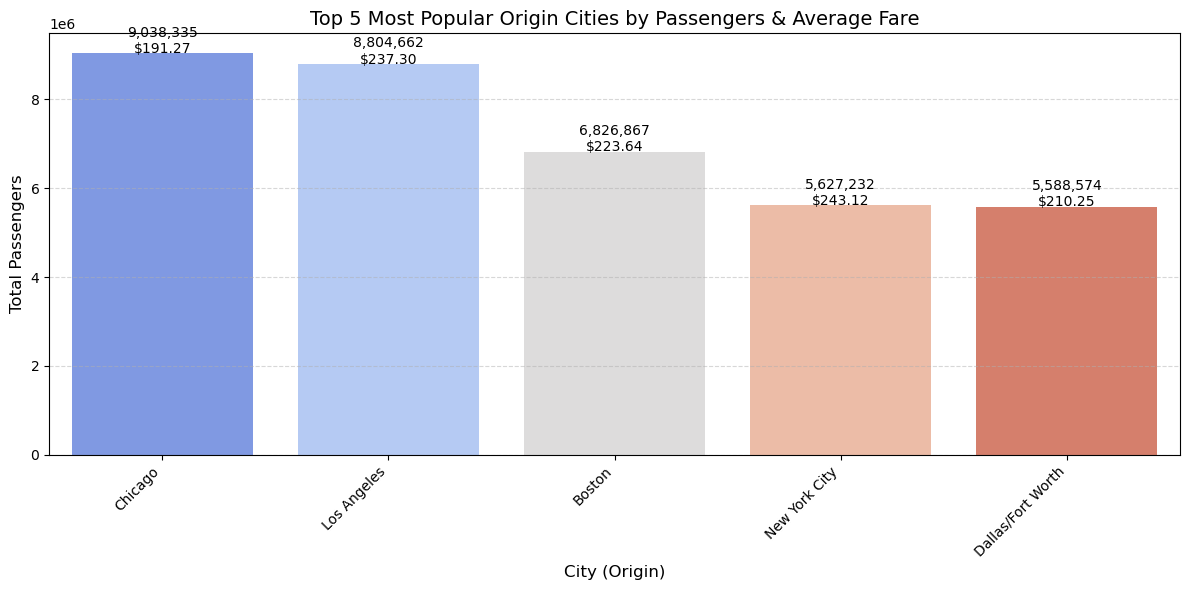

In [71]:
import re
def clean_city_name(city):
    return re.sub(r'\s*\(.*?\)|,\s*\w{2}', '', city)

df['city1_clean'] = df['city1'].apply(clean_city_name)

# Mengelompokkan berdasarkan city1, menjumlahkan penumpang, dan menghitung rata-rata harga tiket
popular_cities = df.groupby('city1_clean').agg({'passengers': 'sum', 'fare': 'mean'}).nlargest(5, 'passengers').reset_index()

# Membuat plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=popular_cities, x='city1_clean', y='passengers', palette='coolwarm')

# Menambahkan anotasi jumlah penumpang dan fare di atas batang
for i, (passengers, fare) in enumerate(zip(popular_cities['passengers'], popular_cities['fare'])):
    ax.text(i, passengers + 2000, f"{passengers:,}\n${fare:.2f}", ha='center', fontsize=10, color='black')

# Kustomisasi tampilan
plt.xlabel('City (Origin)', fontsize=12)
plt.ylabel('Total Passengers', fontsize=12)
plt.title('Top 5 Most Popular Origin Cities by Passengers & Average Fare', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()

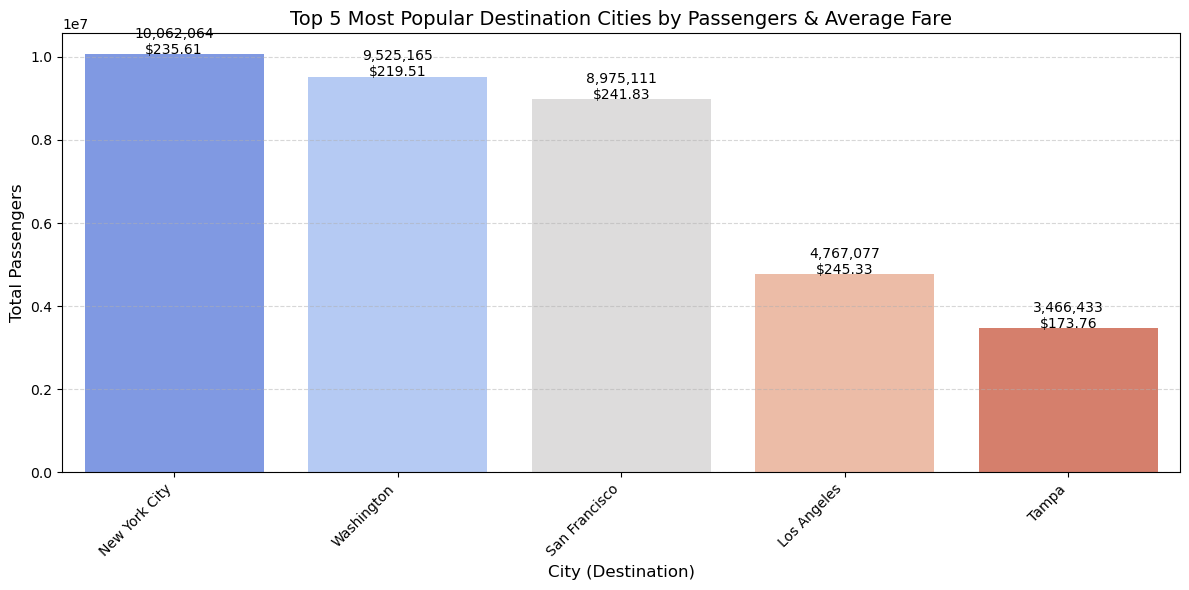

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_city_name(city):
    return re.sub(r'\s*\(.*?\)|,\s*\w{2}', '', city)

df['city2_clean'] = df['city2'].apply(clean_city_name)

# Mengelompokkan berdasarkan city1, menjumlahkan penumpang, dan menghitung rata-rata harga tiket
popular_cities = df.groupby('city2_clean').agg({'passengers': 'sum', 'fare': 'mean'}).nlargest(5, 'passengers').reset_index()

# Membuat plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=popular_cities, x='city2_clean', y='passengers', palette='coolwarm')

# Menambahkan anotasi jumlah penumpang dan fare di atas batang
for i, (passengers, fare) in enumerate(zip(popular_cities['passengers'], popular_cities['fare'])):
    ax.text(i, passengers + 2000, f"{passengers:,}\n${fare:.2f}", ha='center', fontsize=10, color='black')

# Kustomisasi tampilan
plt.xlabel('City (Destination)', fontsize=12)
plt.ylabel('Total Passengers', fontsize=12)
plt.title('Top 5 Most Popular Destination Cities by Passengers & Average Fare', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [199]:
print(df['fare'].mean())

218.97958679433225


In [17]:
city_fare = df.groupby(['city2'])['fare'].mean().reset_index().nlargest(10,'fare')

plt.figure(figsize=(10, 6))
sns.barplot(data=city_fare, x='fare', y='city2', palette='coolwarm')
plt.title('Top 10 Kota Tujuan dengan Rata-rata Harga Tiket Tertinggi')
plt.xlabel('Rata-rata Harga Tiket (USD)')
plt.ylabel('Kota Tujuan (city2)')
plt.grid(axis='x')
plt.show()

city2        fare
71        Palm Springs, CA  328.574850
1              Bozeman, MT  316.068095
20        Fayetteville, AR  285.791512
40            Key West, FL  280.895882
53             Memphis, TN  256.497688
50             Madison, WI  254.867438
112  Steamboat Springs, CO  251.798333
117      Traverse City, MI  250.306667
96           San Diego, CA  250.176086
6           Cincinnati, OH  248.191273

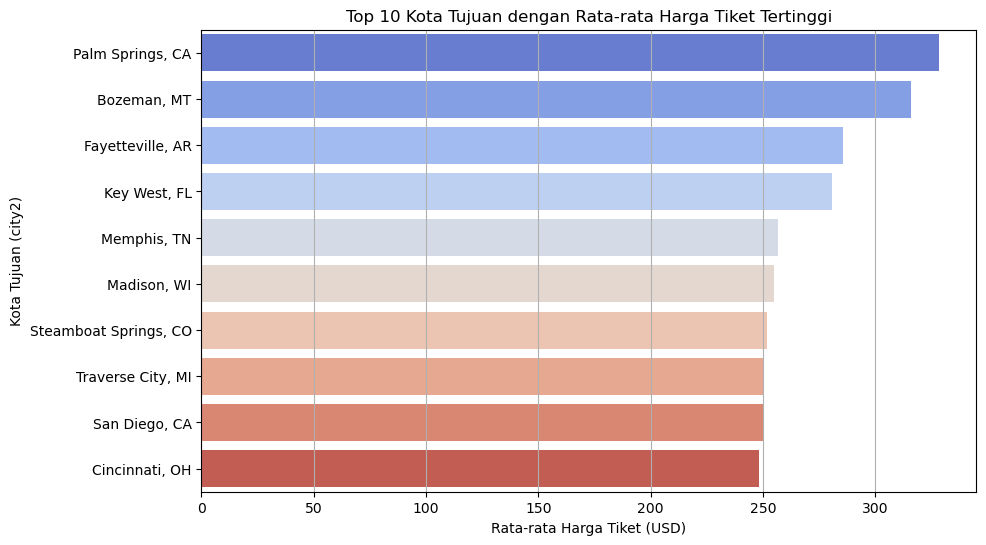

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=city_fare, x='fare', y='city2', palette='coolwarm')
plt.title('Top 10 Kota Tujuan dengan Rata-rata Harga Tiket Tertinggi')
plt.xlabel('Rata-rata Harga Tiket (USD)')
plt.ylabel('Kota Tujuan (city2)')
plt.grid(axis='x')
plt.show()

In [23]:
city_fare = df.groupby(['city1'])['fare'].mean().reset_index().nlargest(10,'fare')

plt.figure(figsize=(10, 6))
sns.barplot(data=city_fare, x='fare', y='city1', palette='coolwarm')
plt.title('Top 10 Kota Tujuan dengan Rata-rata Harga Tiket Tertinggi')
plt.xlabel('Rata-rata Harga Tiket (USD)')
plt.ylabel('Kota Tujuan (city2)')
plt.grid(axis='x')
plt.show()

city1        fare
71        Jackson, WY  398.273836
46          Eagle, CO  359.383448
7           Aspen, CO  357.422326
52   Fayetteville, AR  326.657366
74      Kalispell, MT  292.972000
137        Tucson, AZ  288.815151
131       Spokane, WA  277.868228
128       Seattle, WA  277.528690
68     Huntsville, AL  270.672799
112  Philadelphia, PA  269.652979

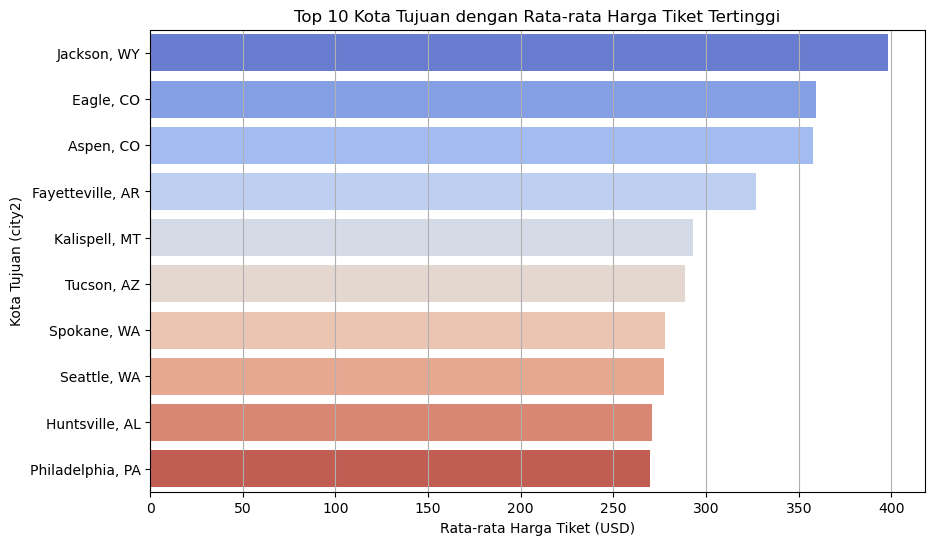

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=city_fare, x='fare', y='city1', palette='coolwarm')
plt.title('Top 10 Kota Tujuan dengan Rata-rata Harga Tiket Tertinggi')
plt.xlabel('Rata-rata Harga Tiket (USD)')
plt.ylabel('Kota Tujuan (city2)')
plt.grid(axis='x')
plt.show()

## Fare City and year


Top 3 Most Expensive Destinations: ['Palm Springs, CA', 'Bozeman, MT', 'Fayetteville, AR', 'Key West, FL', 'Memphis, TN']


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

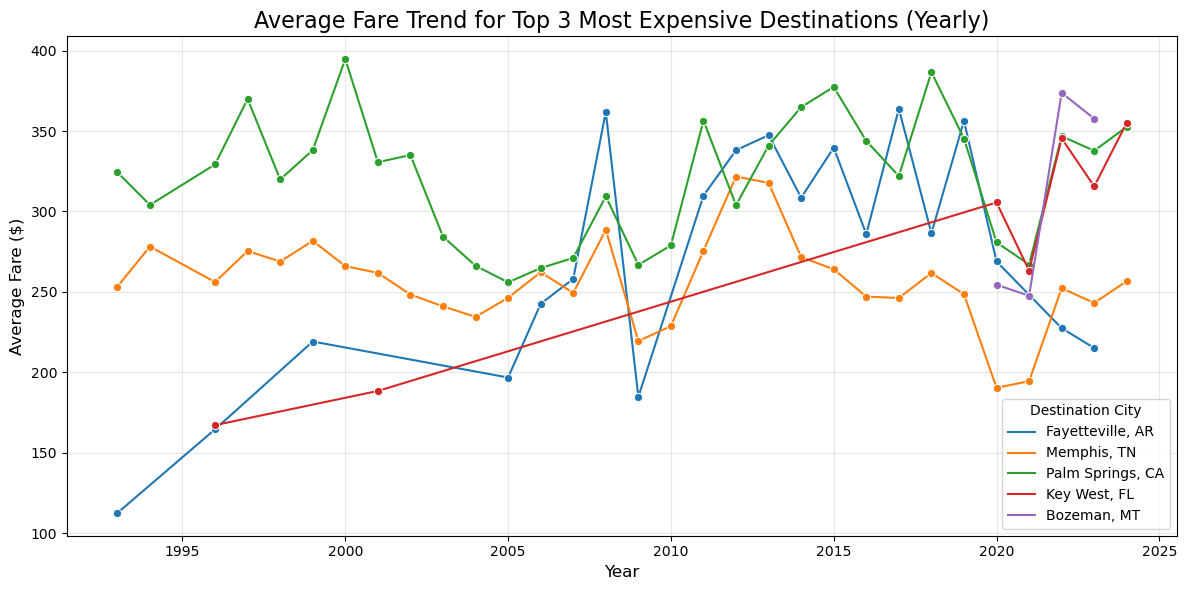

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

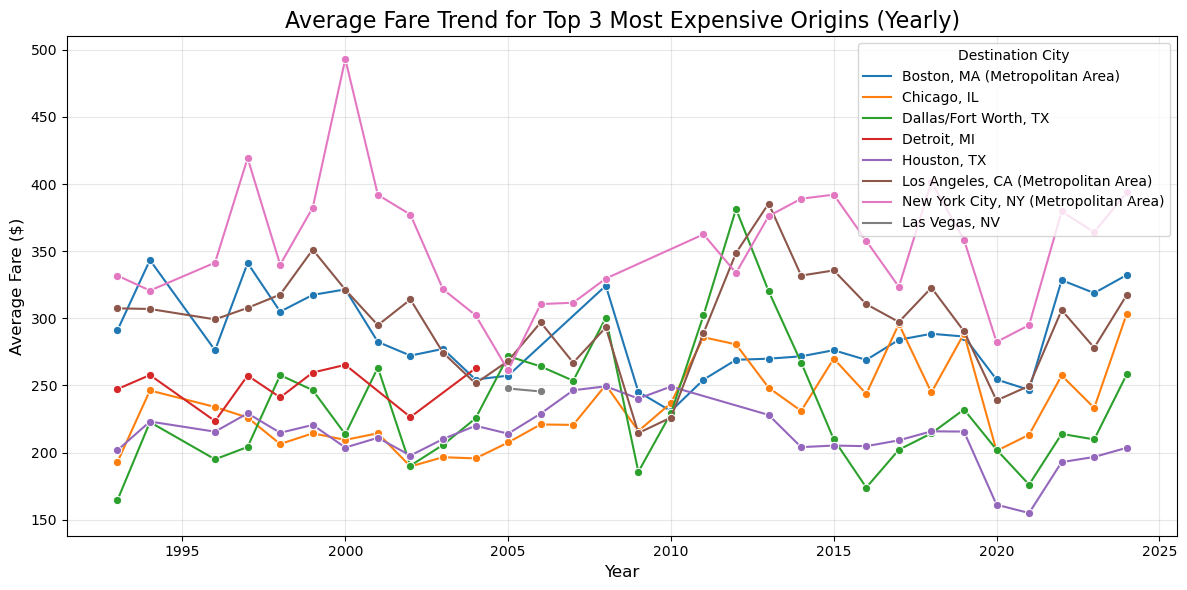

In [75]:
# Step 1: Group by destination and calculate the average fare
city_fare = df.groupby('city2').agg({'fare': 'mean'}).reset_index()

# Step 2: Identify the top 3 most expensive destinations
top_3_expensive_cities = city_fare.sort_values(by='fare', ascending=False).head(5)['city2'].tolist()

print("Top 3 Most Expensive Destinations:", top_3_expensive_cities)

# Step 3: Filter data for the top 3 destinations
df_top_3 = df[df['city2'].isin(top_3_expensive_cities)]

# Step 4: Group by year and city2 to calculate average fare
fare_trend = df_top_3.groupby(['Year', 'city2'])['fare'].mean().reset_index()

# Step 5: Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_trend, x='Year', y='fare', hue='city2', marker='o')

# Customizing the plot
plt.title('Average Fare Trend for Top 3 Most Expensive Destinations (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.legend(title='Destination City', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

# Step 3: Filter data for the top 3 destinations
df_top_3 = df[df['city2'].isin(top_3_expensive_cities)]

# Step 4: Group by year and city2 to calculate average fare
fare_trend = df_top_3.groupby(['Year', 'city1'])['fare'].mean().reset_index()

# Step 5: Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=fare_trend, x='Year', y='fare', hue='city1', marker='o')

# Customizing the plot
plt.title('Average Fare Trend for Top 3 Most Expensive Origins (Yearly)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.legend(title='Destination City', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()



In [76]:
### most expensive flight

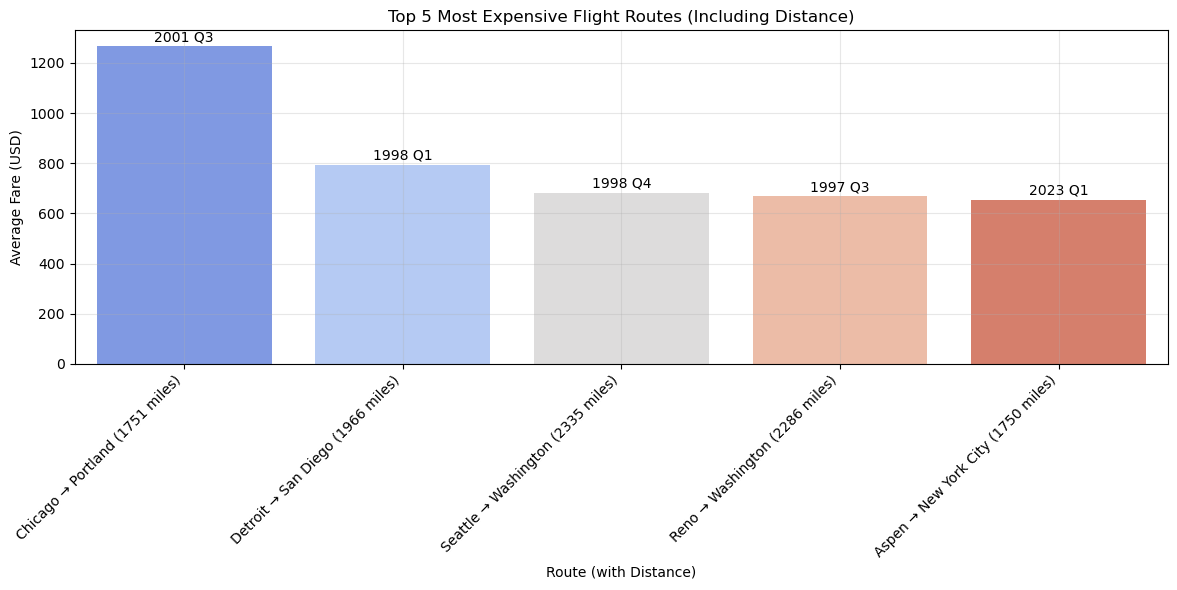

In [77]:
df['nsmiles'] = pd.to_numeric(df['nsmiles'], errors='coerce')
expensive_flight = df.groupby(['city1', 'city2', 'nsmiles', 'Year', 'quarter'])['fare'].mean().reset_index()
expensive_flight = expensive_flight.nlargest(5, 'fare')

def clean_city_name(city):
    return re.sub(r'\s*\(.*?\)|,\s*\w{2}', '', city)

expensive_flight['city1_clean'] = expensive_flight['city1'].apply(clean_city_name)
expensive_flight['city2_clean'] = expensive_flight['city2'].apply(clean_city_name)
expensive_flight['route'] = expensive_flight['city1_clean'] + " → " + expensive_flight['city2_clean'] + " (" + expensive_flight['nsmiles'].astype(str) + " miles)"
expensive_flight['year_quarter'] = expensive_flight['Year'].astype(str) + " Q" + expensive_flight['quarter'].astype(str)
expensive_flight = expensive_flight.sort_values(by='fare', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(
    data=expensive_flight,
    x='route', y='fare',
    ax=ax1, palette='coolwarm'
)

ax1.set_xlabel('Route (with Distance)')
ax1.set_ylabel('Average Fare (USD)')
ax1.set_title('Top 5 Most Expensive Flight Routes (Including Distance)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
for i, (route, fare, year_quarter) in enumerate(zip(expensive_flight['route'], expensive_flight['fare'], expensive_flight['year_quarter'])):
    ax1.text(i, fare + 20, year_quarter, ha='center', fontsize=10, color='black')
ax1.grid(alpha=0.3)
plt.tight_layout()
plt.show()

https://chicago.suntimes.com/2020/9/9/21427976/this-week-in-history-september-11-terrorist-attack-chicago
https://www.colorado.com/cities-and-towns/aspen

In [79]:
### flight fare with low/lg fare

In [80]:
excluded_airports = ["TSS", "JRB","MPB"]

df_filtered = df[~df['airport_1'].isin(excluded_airports) & ~df['airport_2'].isin(excluded_airports)]


print(df_filtered.shape)

print(df.shape)

(245892, 27)
(245955, 27)


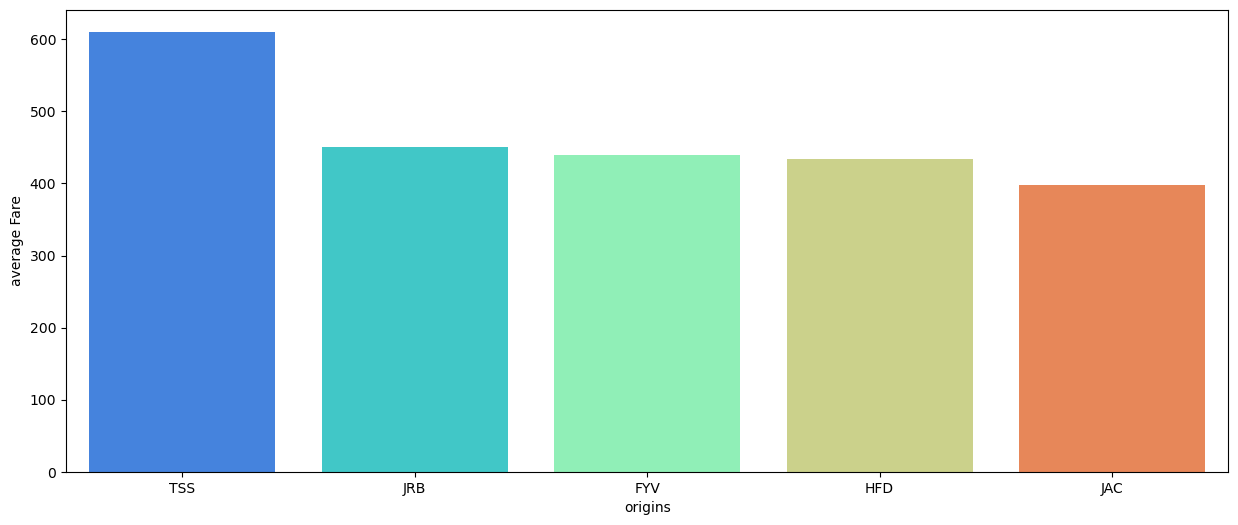

In [81]:
expensive_origins_airports = df.groupby('airport_1')['fare'].mean().reset_index()
expensive_origins_airports = expensive_origins_airports.nlargest(5,'fare')

plt.figure(figsize=(15,6))
sns.barplot(data=expensive_origins_airports,x='airport_1',y='fare', palette='rainbow')
plt.xlabel('origins')
plt.ylabel('average Fare')
plt.show()

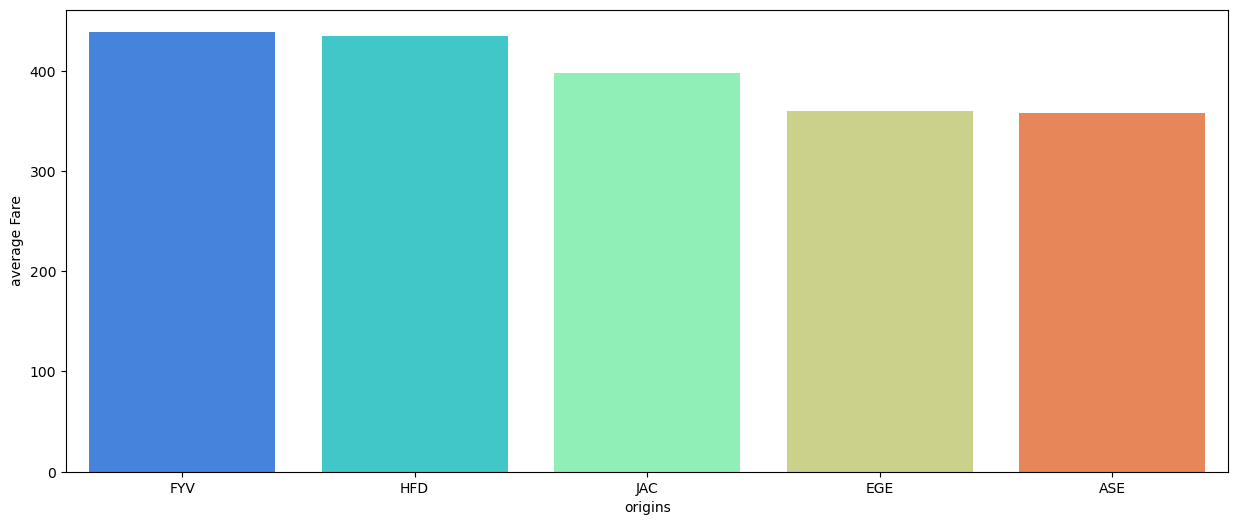

In [82]:
expensive_origins_airports = df_filtered.groupby('airport_1')['fare'].mean().reset_index()
expensive_origins_airports = expensive_origins_airports.nlargest(5,'fare')

plt.figure(figsize=(15,6))
sns.barplot(data=expensive_origins_airports,x='airport_1',y='fare', palette='rainbow')
plt.xlabel('origins')
plt.ylabel('average Fare')
plt.show()

Tss is a heliport, udah pasti mahal
JRB is also a heliport
FYV is a public executive airport



In [205]:
vgt_avg_fare = df[df['airport_1'] == 'FYV']['fare'].mean()
print(vgt_avg_fare)

439.0


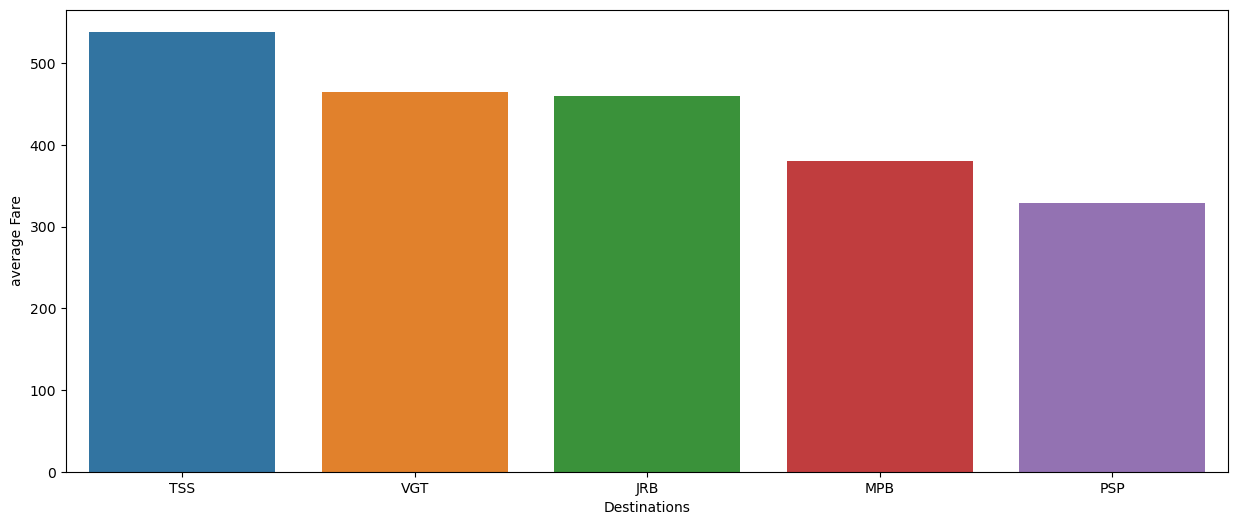

In [84]:
expensive_destination_airports = df.groupby('airport_2')['fare'].mean().reset_index()
expensive_destination_airports = expensive_destination_airports.nlargest(5,'fare')

plt.figure(figsize=(15,6))
sns.barplot(data=expensive_destination_airports,x='airport_2',y='fare')
plt.xlabel('Destinations')
plt.ylabel('average Fare')
plt.show()

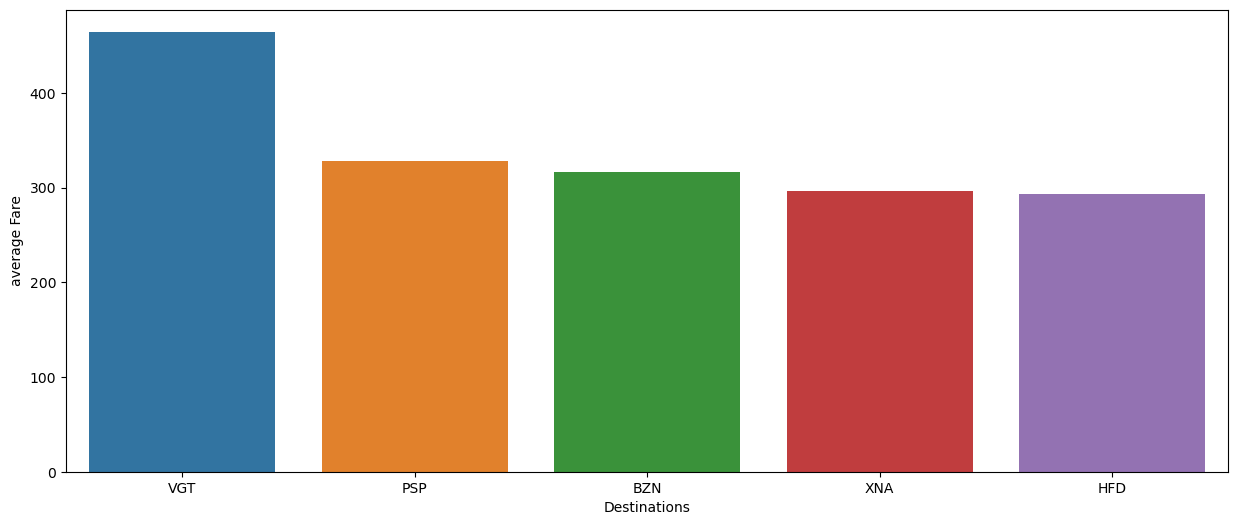

In [85]:
expensive_destination_airports = df_filtered.groupby('airport_2')['fare'].mean().reset_index()
expensive_destination_airports = expensive_destination_airports.nlargest(5,'fare')

plt.figure(figsize=(15,6))
sns.barplot(data=expensive_destination_airports,x='airport_2',y='fare')
plt.xlabel('Destinations')
plt.ylabel('average Fare')
plt.show()

In [203]:
vgt_avg_fare = df[df['airport_2'] == 'VGT']['fare'].mean()
print(vgt_avg_fare)

464.6


VGT is from las vegas
tss is a helipad
also JRB
MPB buat pesawat amfibi
PSP (International Airport)

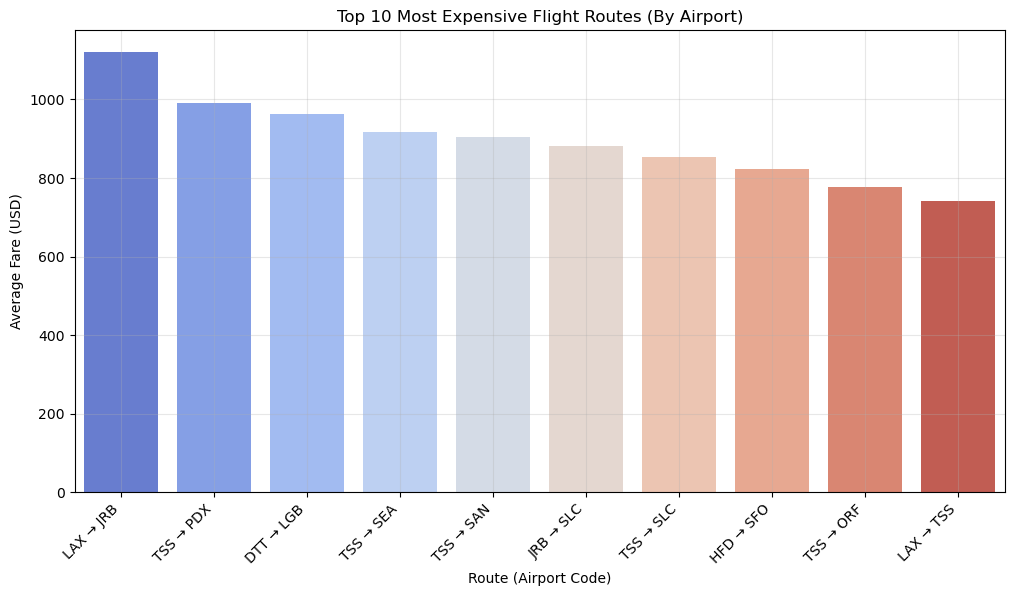

In [87]:
expensive_flight_airports = df.groupby(['airport_1', 'airport_2'])['fare'].mean().reset_index()
expensive_flight_airports = expensive_flight_airports.nlargest(10, 'fare')


expensive_flight_airports['route'] = expensive_flight_airports['airport_1'] + " → " + expensive_flight_airports['airport_2']
expensive_flight_airports = expensive_flight_airports.sort_values(by='fare', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(
    data=expensive_flight_airports,
    x='route', y='fare',
    palette='coolwarm'
)


plt.xlabel('Route (Airport Code)')
plt.ylabel('Average Fare (USD)')
plt.title('Top 10 Most Expensive Flight Routes (By Airport)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

plt.show()


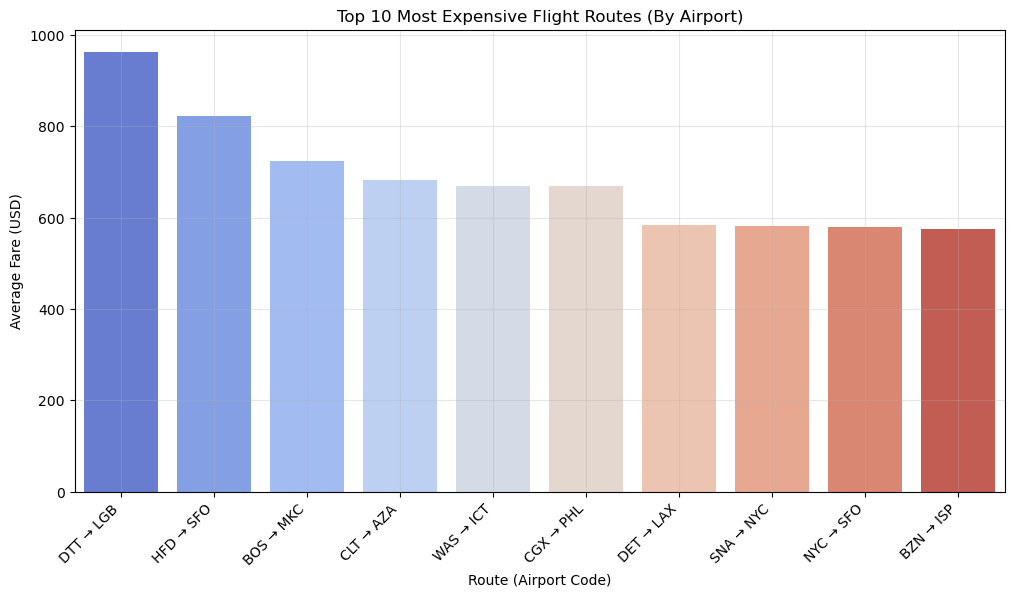

In [88]:
# Step 1: Group data by origin & destination airport and calculate the average fare
expensive_flight_airports = df_filtered.groupby(['airport_1', 'airport_2'])['fare'].mean().reset_index()

# Step 2: Get top 10 most expensive routes
expensive_flight_airports = expensive_flight_airports.nlargest(10, 'fare')

# Step 3: Create a route label
expensive_flight_airports['route'] = expensive_flight_airports['airport_1'] + " → " + expensive_flight_airports['airport_2'] 

# Step 4: Sort data by fare
expensive_flight_airports = expensive_flight_airports.sort_values(by='fare', ascending=False)

# Step 5: Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=expensive_flight_airports,
    x='route', y='fare',
    palette='coolwarm'
)

# Step 6: Formatting
plt.xlabel('Route (Airport Code)')
plt.ylabel('Average Fare (USD)')
plt.title('Top 10 Most Expensive Flight Routes (By Airport)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [209]:
df_route = df[(df['airport_1'] == 'DTT') & (df['airport_2'] == 'LGB')]
avg_fare = df_route['fare'].mean()
print(f"Rata-rata fare untuk rute DTT → LGB adalah: ${avg_fare:.2f}")

Rata-rata fare untuk rute DTT → LGB adalah: $963.50


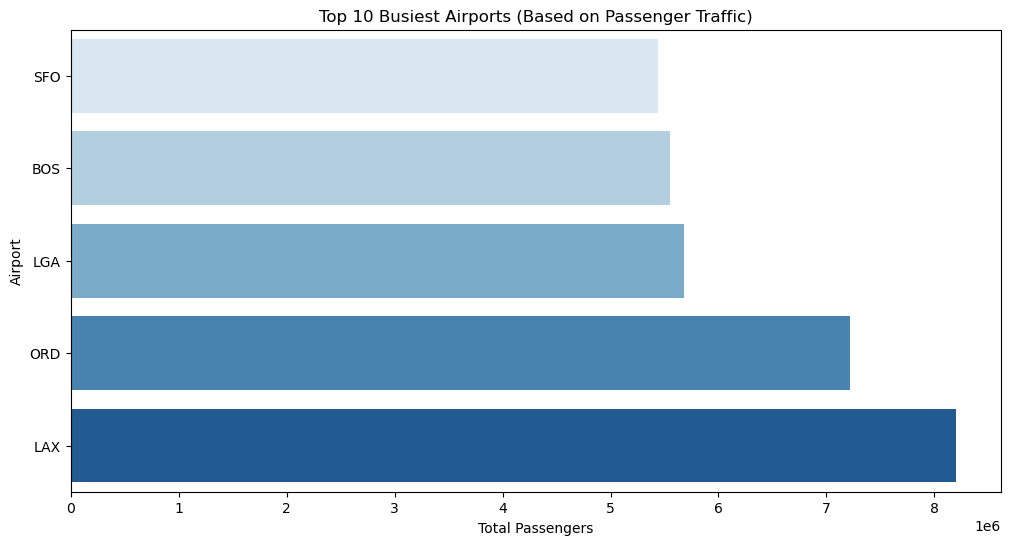

In [89]:
## most bussiest airport


import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung total penumpang per bandara (origin dan destination)
origin_counts = df.groupby("airport_1")["passengers"].sum().reset_index()
destination_counts = df.groupby("airport_2")["passengers"].sum().reset_index()

airport_traffic = origin_counts.merge(destination_counts, left_on="airport_1", right_on="airport_2", suffixes=("_origin", "_destination"))
airport_traffic["total_passengers"] = airport_traffic["passengers_origin"] + airport_traffic["passengers_destination"]

top_airports = airport_traffic.nlargest(5, "total_passengers")


plt.figure(figsize=(12, 6))
sns.barplot(y=top_airports["airport_1"], x=top_airports["total_passengers"], palette="Blues_r")
plt.xlabel("Total Passengers")
plt.ylabel("Airport")
plt.title("Top 10 Busiest Airports (Based on Passenger Traffic)")
plt.gca().invert_yaxis()
plt.show()


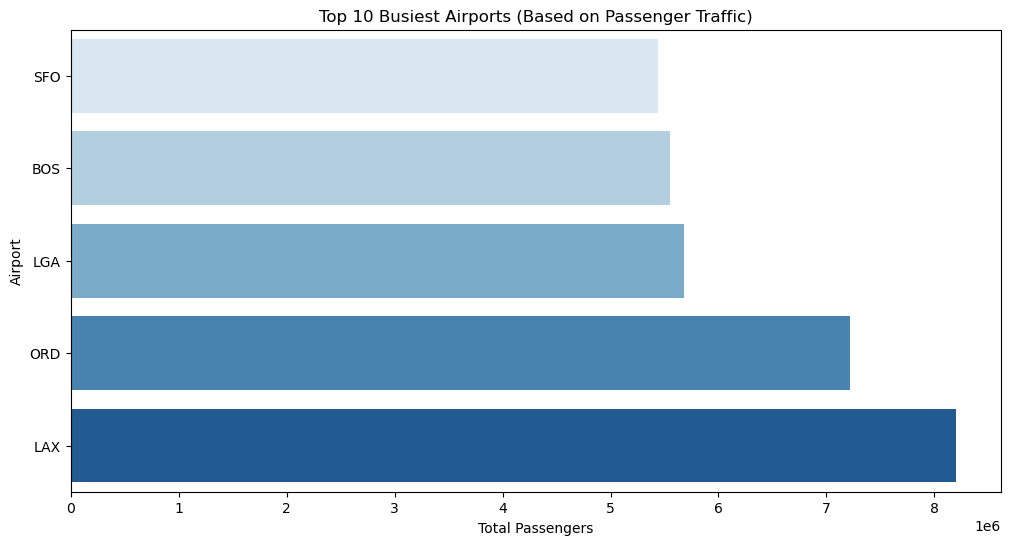

In [90]:
origin_counts = df_filtered.groupby("airport_1")["passengers"].sum().reset_index()
destination_counts = df_filtered.groupby("airport_2")["passengers"].sum().reset_index()

# Gabungkan data untuk mendapatkan total lalu lintas di setiap bandara
airport_traffic = origin_counts.merge(destination_counts, left_on="airport_1", right_on="airport_2", suffixes=("_origin", "_destination"))
airport_traffic["total_passengers"] = airport_traffic["passengers_origin"] + airport_traffic["passengers_destination"]

# Pilih 10 bandara tersibuk
top_airports = airport_traffic.nlargest(5, "total_passengers")

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(y=top_airports["airport_1"], x=top_airports["total_passengers"], palette="Blues_r")
plt.xlabel("Total Passengers")
plt.ylabel("Airport")
plt.title("Top 10 Busiest Airports (Based on Passenger Traffic)")
plt.gca().invert_yaxis()
plt.show()


In [91]:
lax_fares = df[(df["airport_1"] == "LAX") | (df["airport_2"] == "LAX")]

# Hitung rata-rata harga tiket di LAX
average_fare_lax = lax_fares["fare"].mean()
print(average_fare_lax)


lax_fares = df[(df["airport_1"] == "VNY") | (df["airport_2"] == "VNY")]

# Hitung rata-rata harga tiket di LAX
average_fare_lax = lax_fares["fare"].mean()
average_fare_lax

225.99068621523577


nan

<Figure size 1200x600 with 0 Axes>

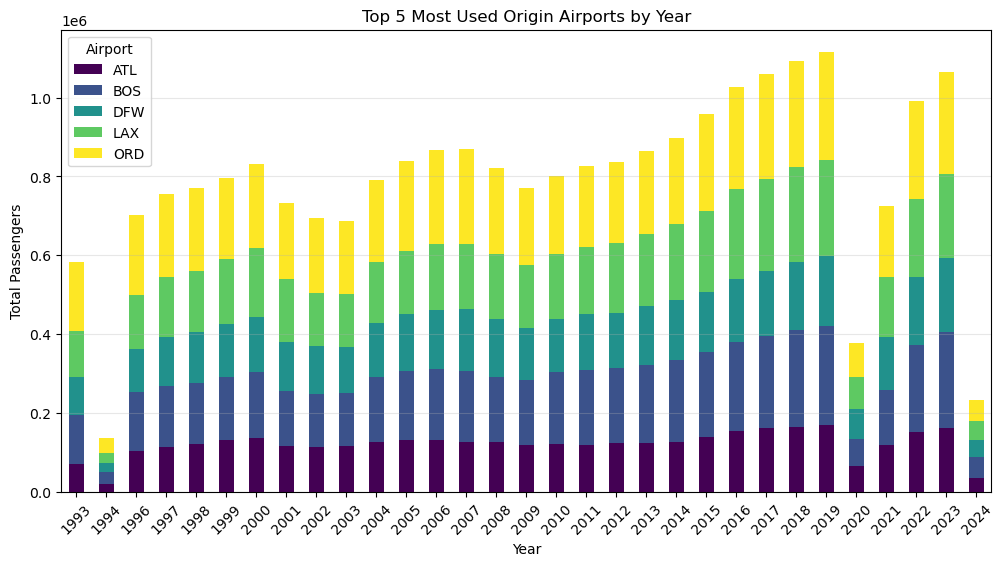

In [92]:


# Step 1: Group data by Year and Origin Airport (airport1), summing total passengers
airport_usage_year = df.groupby(['Year', 'airport_1'])['passengers'].sum().reset_index()

# Step 2: Find the top 5 most used airports across all years
top_airports = airport_usage_year.groupby('airport_1')['passengers'].sum().nlargest(5).index

# Step 3: Filter only those top 5 airports
filtered_airport_usage = airport_usage_year[airport_usage_year['airport_1'].isin(top_airports)]

# Step 4: Pivot for a stacked bar chart
airport_pivot = filtered_airport_usage.pivot(index='Year', columns='airport_1', values='passengers')

# Step 5: Plot the stacked bar chart
plt.figure(figsize=(12, 6))
airport_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.title('Top 5 Most Used Origin Airports by Year')
plt.legend(title='Airport')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x600 with 0 Axes>

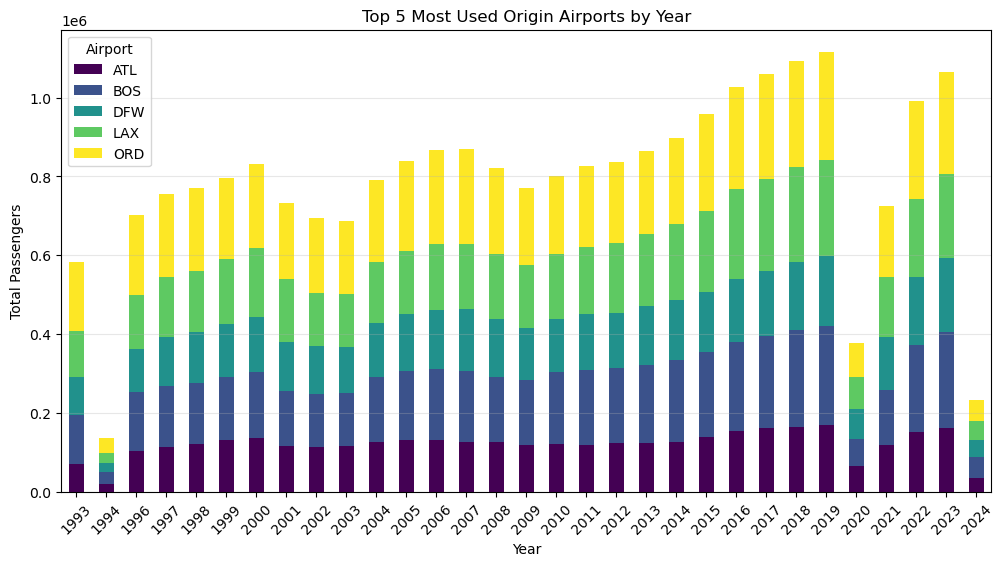

In [93]:
airport_usage_year = df_filtered.groupby(['Year', 'airport_1'])['passengers'].sum().reset_index()

# Step 2: Find the top 5 most used airports across all years
top_airports = airport_usage_year.groupby('airport_1')['passengers'].sum().nlargest(5).index

# Step 3: Filter only those top 5 airports
filtered_airport_usage = airport_usage_year[airport_usage_year['airport_1'].isin(top_airports)]

# Step 4: Pivot for a stacked bar chart
airport_pivot = filtered_airport_usage.pivot(index='Year', columns='airport_1', values='passengers')

# Step 5: Plot the stacked bar chart
plt.figure(figsize=(12, 6))
airport_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.title('Top 5 Most Used Origin Airports by Year')
plt.legend(title='Airport')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.show()


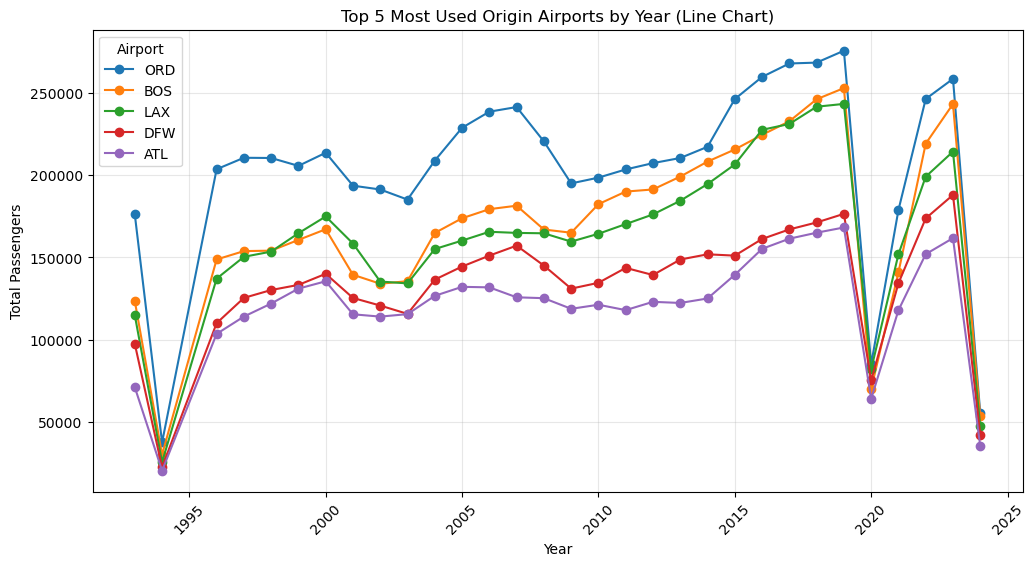

In [94]:
# Step 1: Group data by Year and Origin Airport (airport_1), summing total passengers
airport_usage_year = df.groupby(['Year', 'airport_1'])['passengers'].sum().reset_index()

# Step 2: Find the top 5 most used airports across all years
top_airports = airport_usage_year.groupby('airport_1')['passengers'].sum().nlargest(5).index

# Step 3: Filter only those top 5 airports
filtered_airport_usage = airport_usage_year[airport_usage_year['airport_1'].isin(top_airports)]

# Step 4: Plot using a line chart
plt.figure(figsize=(12, 6))

for airport in top_airports:
    subset = filtered_airport_usage[filtered_airport_usage["airport_1"] == airport]
    plt.plot(subset["Year"], subset["passengers"], marker="o", linestyle="-", label=airport)

plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Top 5 Most Used Origin Airports by Year (Line Chart)")
plt.legend(title="Airport")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()


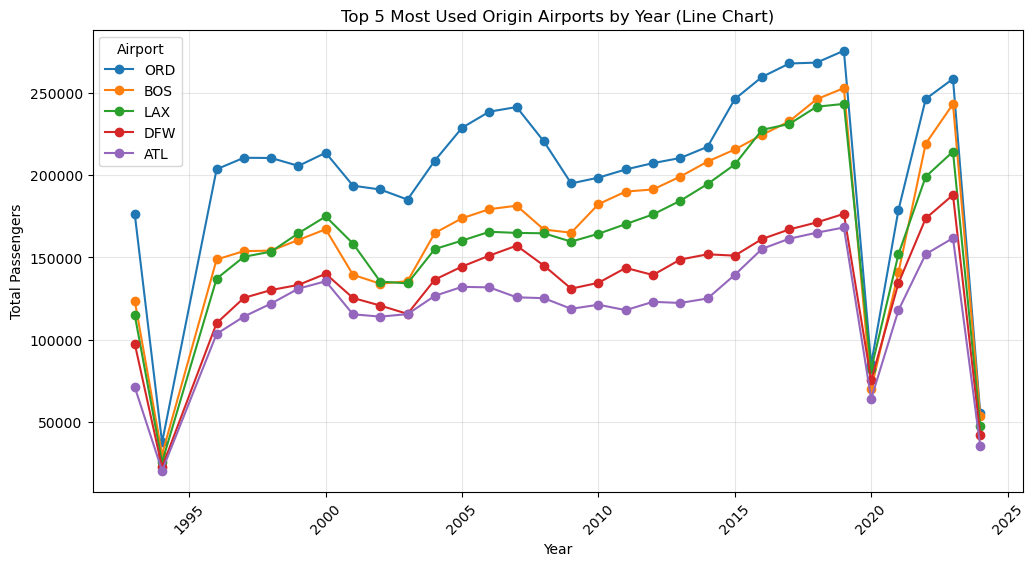

In [95]:
airport_usage_year = df_filtered.groupby(['Year', 'airport_1'])['passengers'].sum().reset_index()

# Step 2: Find the top 5 most used airports across all years
top_airports = airport_usage_year.groupby('airport_1')['passengers'].sum().nlargest(5).index

# Step 3: Filter only those top 5 airports
filtered_airport_usage = airport_usage_year[airport_usage_year['airport_1'].isin(top_airports)]

# Step 4: Plot using a line chart
plt.figure(figsize=(12, 6))

for airport in top_airports:
    subset = filtered_airport_usage[filtered_airport_usage["airport_1"] == airport]
    plt.plot(subset["Year"], subset["passengers"], marker="o", linestyle="-", label=airport)

plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Top 5 Most Used Origin Airports by Year (Line Chart)")
plt.legend(title="Airport")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

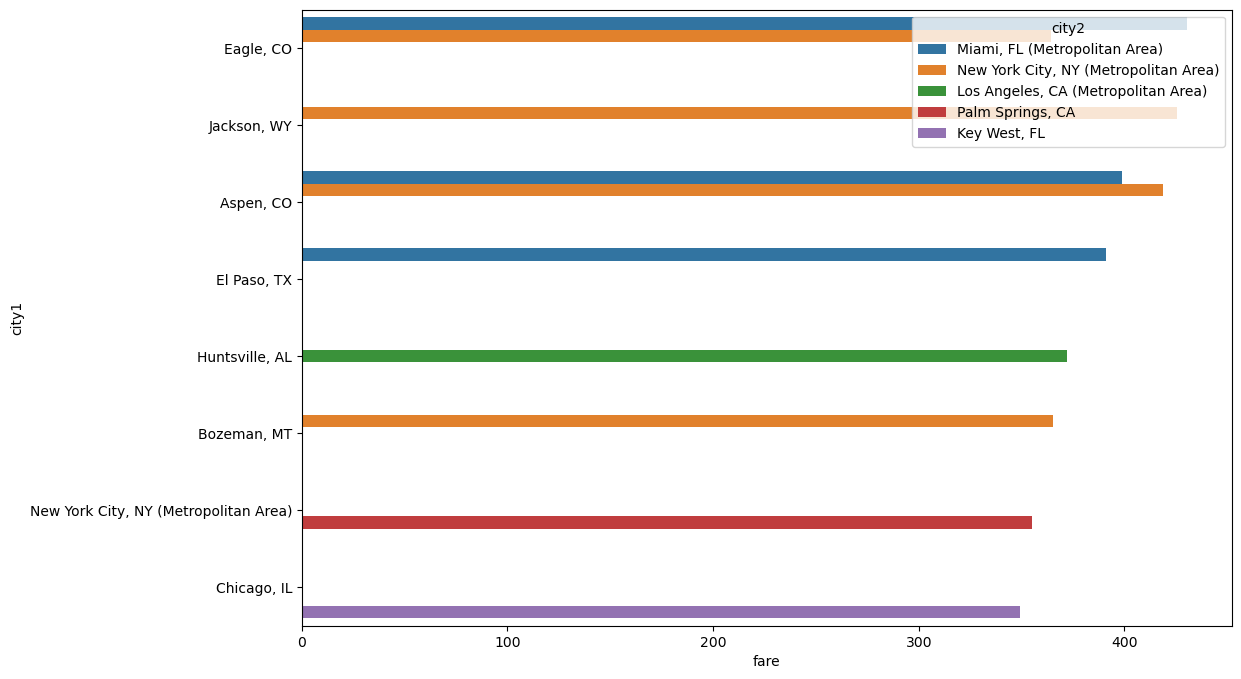

In [97]:
City_pairs = df.groupby(['city1','city2'])['fare'].mean().reset_index()

top_five_city_pairs = City_pairs.nlargest(10,'fare')

plt.figure(figsize=(12,8))
sns.barplot(x='fare', y='city1', hue='city2', data = top_five_city_pairs)
plt.show()

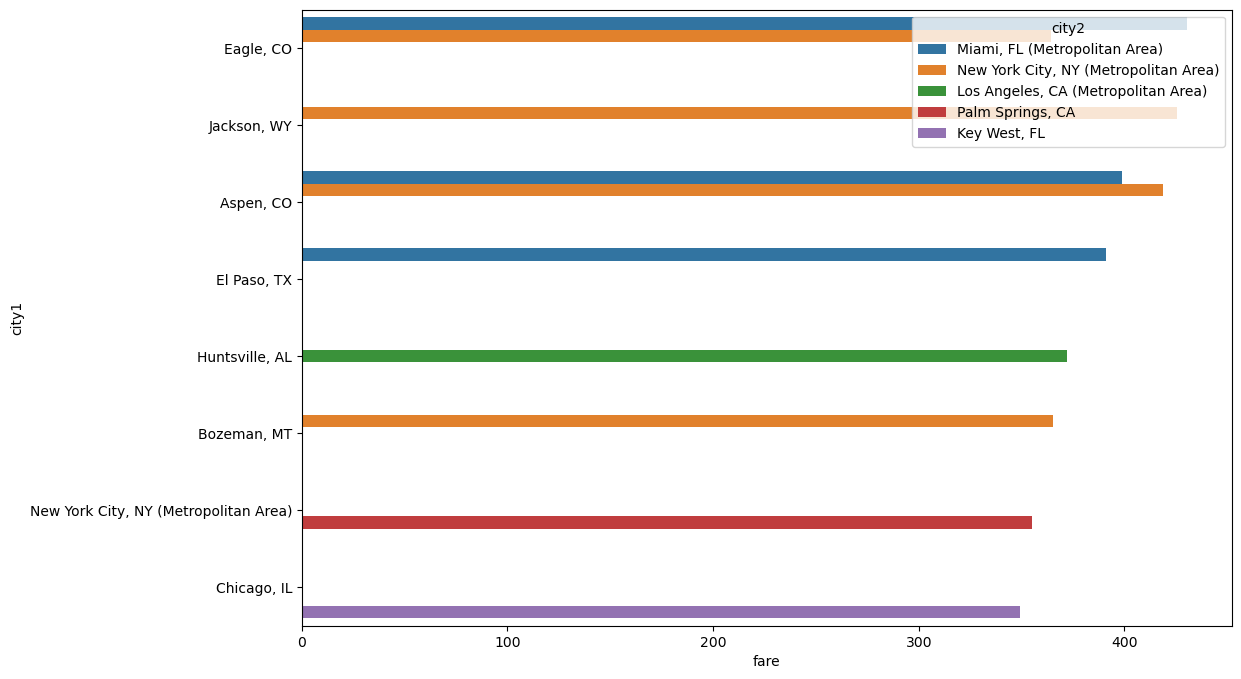

In [98]:
City_pairs = df_filtered.groupby(['city1','city2'])['fare'].mean().reset_index()

top_five_city_pairs = City_pairs.nlargest(10,'fare')

plt.figure(figsize=(12,8))
sns.barplot(x='fare', y='city1', hue='city2', data = top_five_city_pairs)
plt.show()

## Feature Engineering

### Time Based Feature


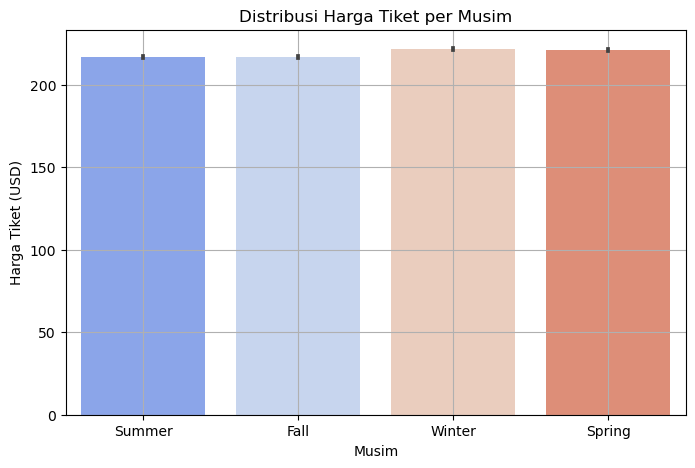

In [221]:
df['Season'] = df['quarter'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Season', y='fare', palette='coolwarm')
plt.title('Distribusi Harga Tiket per Musim')
plt.xlabel('Musim')
plt.ylabel('Harga Tiket (USD)')
plt.grid()
plt.show()

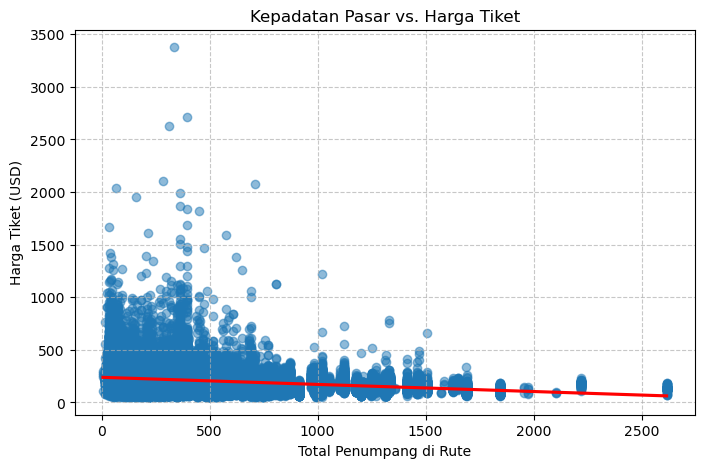

In [103]:
df['Market_Density'] = df.groupby(['city1', 'city2'])['passengers'].transform('mean')

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Market_Density', y='fare', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Kepadatan Pasar vs. Harga Tiket')
plt.xlabel('Total Penumpang di Rute')
plt.ylabel('Harga Tiket (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

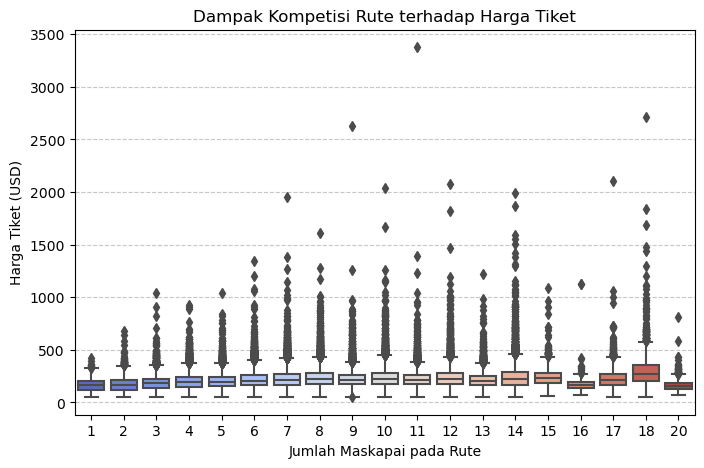

In [104]:
df['Route_Competition'] = df.groupby(['city1', 'city2'])['carrier_lg'].transform('nunique')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Route_Competition', y='fare', palette='coolwarm')
plt.title('Dampak Kompetisi Rute terhadap Harga Tiket')
plt.xlabel('Jumlah Maskapai pada Rute')
plt.ylabel('Harga Tiket (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

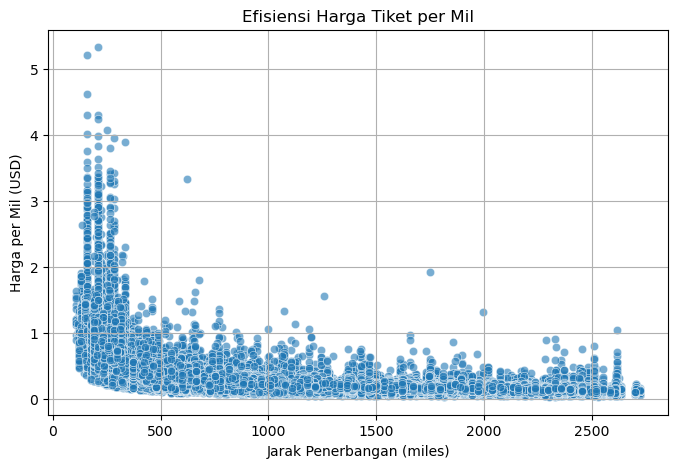

In [102]:
df['Fare_per_mile'] = df['fare'] / df['nsmiles']


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='nsmiles', y='Fare_per_mile', alpha=0.6)
plt.title('Efisiensi Harga Tiket per Mil')
plt.xlabel('Jarak Penerbangan (miles)')
plt.ylabel('Harga per Mil (USD)')
plt.grid()
plt.show()

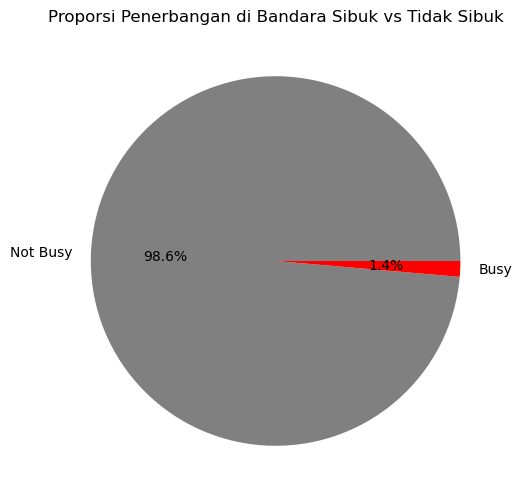

Threshold 75%: 3585.75
Threshold 90%: 8457.099999999999


In [105]:
airport_counts = pd.concat([df['airport_1'], df['airport_2']]).value_counts()
threshold = airport_counts.quantile(0.75)

df['Busy_Airport_1'] = df['airport_1'].map(lambda x: 1 if airport_counts.get(x, 0) > threshold else 0)
df['Busy_Airport_2'] = df['airport_2'].map(lambda x: 1 if airport_counts.get(x, 0) > threshold else 0)
df['Busy_Airport'] = df['Busy_Airport_1'] | df['Busy_Airport_2']

plt.figure(figsize=(6, 6))
df['Busy_Airport'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Busy', 'Busy'], colors=['gray', 'red'])
plt.title('Proporsi Penerbangan di Bandara Sibuk vs Tidak Sibuk')
plt.ylabel('')
plt.show()

print(f"Threshold 75%: {airport_counts.quantile(0.75)}")
print(f"Threshold 90%: {airport_counts.quantile(0.90)}")


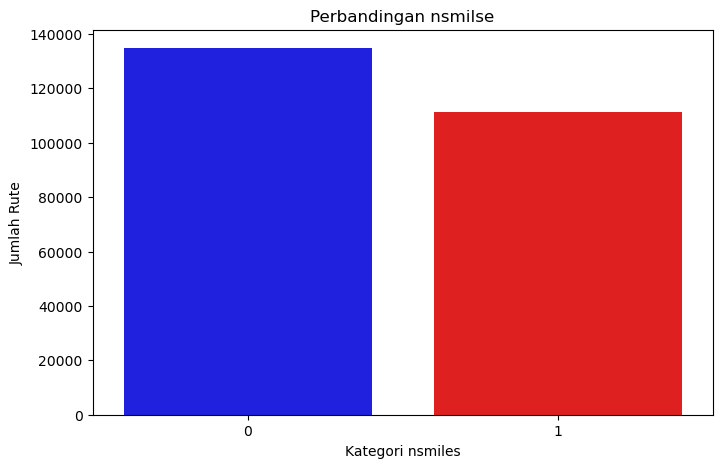

In [193]:
df['above_average'] = df['nsmiles'].apply(lambda x: 1 if x > 1118 else 0)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='above_average', palette=['blue', 'red'])

plt.title('Perbandingan nsmilse')
plt.xlabel('Kategori nsmiles')
plt.ylabel('Jumlah Rute')
plt.show()

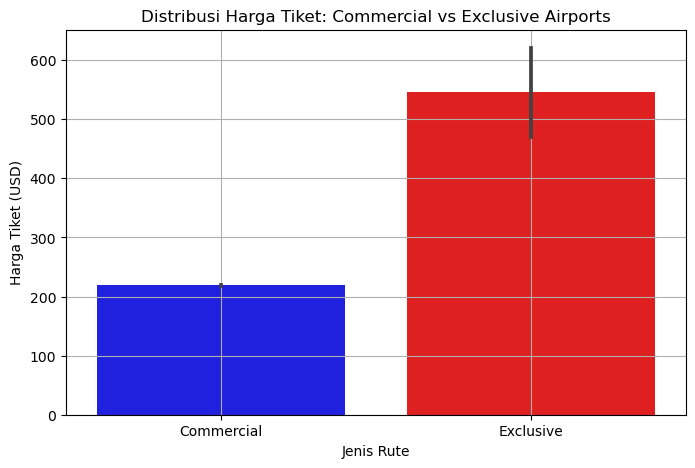

In [107]:
exclusive_airports = ["TSS", "JRB", "MPB"]

df['Exclusive_Airport_1'] = df['airport_1'].apply(lambda x: 1 if x in exclusive_airports else 0)
df['Exclusive_Airport_2'] = df['airport_2'].apply(lambda x: 1 if x in exclusive_airports else 0)
df['Exclusive_Route'] = df['Exclusive_Airport_1'] | df['Exclusive_Airport_2']

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Exclusive_Route', y='fare', palette=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Commercial', 'Exclusive'])
plt.xlabel('Jenis Rute')
plt.ylabel('Harga Tiket (USD)')
plt.title('Distribusi Harga Tiket: Commercial vs Exclusive Airports')
plt.grid()
plt.show()

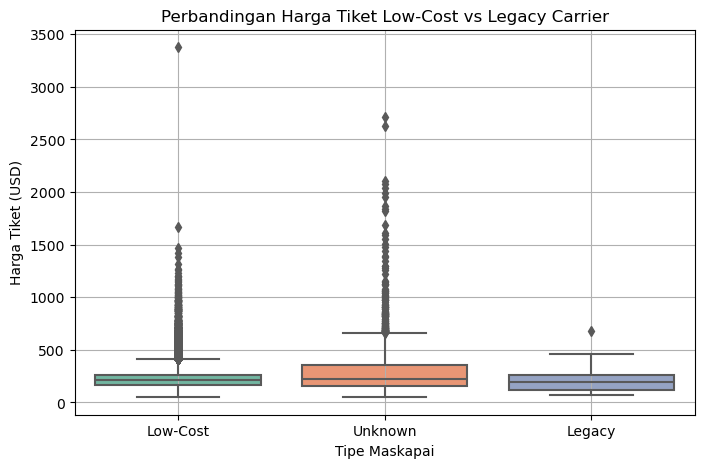

In [106]:
df['Carrier_Type'] = df.apply(lambda row: 'Low-Cost' if pd.notna(row['carrier_low']) 
                              else ('Legacy' if pd.notna(row['carrier_lg']) else 'Unknown'), axis=1)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Carrier_Type', y='fare', palette='Set2')
plt.title('Perbandingan Harga Tiket Low-Cost vs Legacy Carrier')
plt.xlabel('Tipe Maskapai')
plt.ylabel('Harga Tiket (USD)')
plt.grid()
plt.show()

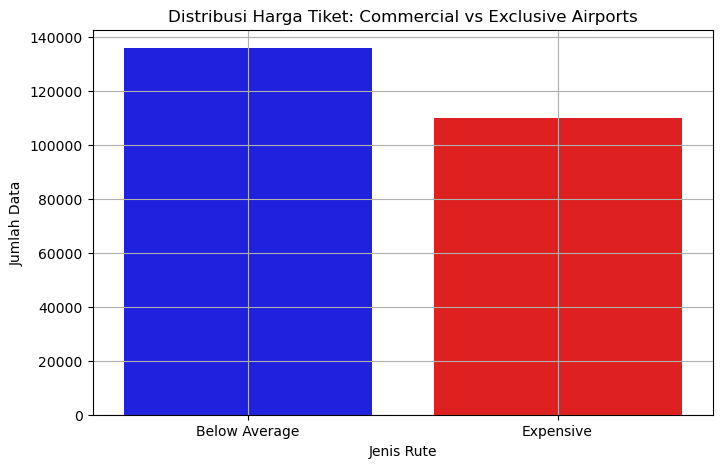

In [108]:
average_fare = df['fare'].mean()

df['High_Fare'] = df['fare'].apply(lambda x: 1 if x > average_fare else 0)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='High_Fare', palette=['blue', 'red'])

plt.xticks(ticks=[0, 1], labels=['Below Average', 'Expensive'])
plt.xlabel('Jenis Rute')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Harga Tiket: Commercial vs Exclusive Airports')
plt.grid()
plt.show()

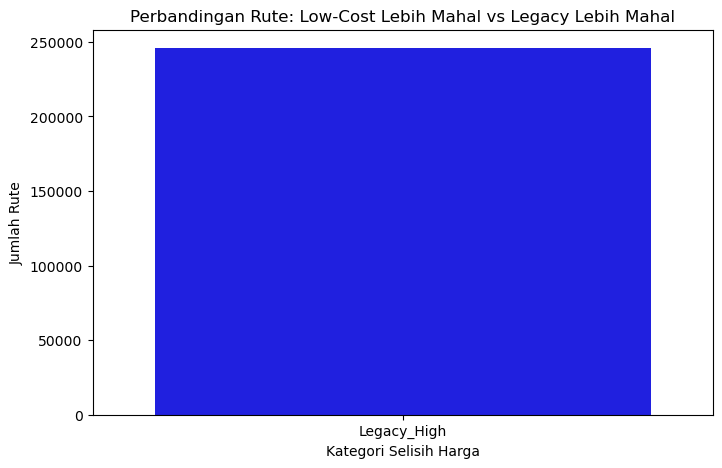

Empty DataFrame
Columns: [tbl, Year, quarter, citymarketid_1, citymarketid_2, city1, city2, airportid_1, airportid_2, airport_1, airport_2, nsmiles, passengers, fare, carrier_lg, large_ms, fare_lg, carrier_low, lf_ms, fare_low, Geocoded_City1, Geocoded_City2, tbl1apk, passenger_group, quarter_year, city1_clean, city2_clean, Season, Fare_per_mile, Market_Density, Route_Competition, Busy_Airport_1, Busy_Airport_2, Busy_Airport, Carrier_Type, Exclusive_Airport_1, Exclusive_Airport_2, Exclusive_Route, High_Fare, Fare_Low_Cost_vs_Legacy, difference]
Index: []

[0 rows x 41 columns]


In [109]:
df['Fare_Low_Cost_vs_Legacy'] = df['fare_lg'].fillna(0) - df['fare_low'].fillna(0)
df['difference'] = df['Fare_Low_Cost_vs_Legacy'].apply(lambda x: 'Low_Cost_High' if x < 0 else 'Legacy_High')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='difference', palette=['blue', 'red'])

plt.title('Perbandingan Rute: Low-Cost Lebih Mahal vs Legacy Lebih Mahal')
plt.xlabel('Kategori Selisih Harga')
plt.ylabel('Jumlah Rute')
plt.show()



print(df[df['Fare_Low_Cost_vs_Legacy'] < 0])  

In [110]:
print((df['Fare_Low_Cost_vs_Legacy'] < 0).sum())  # Jumlah yang low-cost lebih mahal
print((df['Fare_Low_Cost_vs_Legacy'] >= 0).sum())  

0
245955
